# Project

# House Price Prediction
#Problem Statement: Predict The House sell Prices


In [1]:
#LIBRARIES
import numpy as np                                   #Linear algebra  #used for working with arrays
import pandas as pd                                  #Analyze data.learning by reading
import matplotlib.pyplot as plt                      #Data Visuallization
import seaborn as sns                                #data visuallization library based on matplotlib
from sklearn.preprocessing import LabelEncoder       #Converts categorical column into numerical column
le=LabelEncoder()                                    #creating alias
import warnings                                      #It ignores the warnings
warnings.filterwarnings('ignore')                    #It ignores the warnings
from sklearn.linear_model import LogisticRegression  #LogisticRegression
from sklearn.tree import DecisionTreeClassifier      #DecisionTree
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.ensemble import AdaBoostClassifier      #AdaBoost(Boosting)
from sklearn.tree import DecisionTreeClassifier      #Decision Tree
from xgboost import XGBClassifier                    #Xgboost
from sklearn.svm import SVC                          #Support Vector Machine
from sklearn.naive_bayes import MultinomialNB        #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier   #K-Nearest Neighbour
from imblearn.under_sampling import NearMiss         #Near Miss(Class Imbalance Technique)
from sklearn.feature_selection import RFE            #Feature Selection
from sklearn.tree import DecisionTreeRegressor      #Feature Selection
from sklearn.metrics import confusion_matrix         #Confusion Matrix
from sklearn.metrics import classification_report    #classification_report
from sklearn.metrics import roc_auc_score            #AUC_ROC_Curve
from sklearn.metrics import roc_curve                #AUC_ROC_Curve
from scipy.stats import skew                         #used for solving mathematical, scientific, engineering, and technical problems

In [2]:
#Reading the csv file with help of pandas library
train=pd.read_csv(r"C:\Users\HP\Desktop\House Prices\train (7).csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.shape

(1460, 81)

In [4]:
train.info()    #infornation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Accessing starting 5 rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Accessing last 5 rows
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
train.describe()   #Working on numerical columns only

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [10]:
#Accessing all columns of dataset
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

MSZoning,Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle,RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType,ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',BsmtFinType2,Heating',
       'HeatingQC', 'CentralAir', 'Electrical',KitchenQual,Functional,FireplaceQu', 'GarageType,GarageFinish,'GarageQual',
       'GarageCond', 'PavedDrive',PoolQC',
       'Fence', 'MiscFeature',SaleType',
       'SaleCondition'

# Data Cleaning

In [11]:
train=train.drop(["Id"],axis=1)   #Dropping the unique id column

In [12]:
#checking null values from all columns
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [13]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
#missing value treatment for the categorical value
train.PoolQC=train.PoolQC.fillna('No Pool')
train.MiscFeature=train.MiscFeature.fillna('No MiscFeature')
train.Alley=train.Alley.fillna('No Alley')
train.Fence=train.Fence.fillna('No Fence')
train.FireplaceQu=train.FireplaceQu.fillna('No FireplaceQu')
train.GarageCond=train.GarageCond.fillna('No Garage')
train.GarageType=train.GarageType.fillna('No Garage')
train.GarageFinish=train.GarageFinish.fillna('No Garage')
train.GarageQual=train.GarageQual.fillna('No Garage')
train.BsmtExposure=train.BsmtExposure.fillna('No Basement')
train.BsmtFinType2=train.BsmtFinType2.fillna('No Basement')
train.BsmtCond=train.BsmtCond.fillna('No Basement')
train.BsmtQual=train.BsmtQual.fillna('No Basement')
train.BsmtFinType1=train.BsmtFinType1.fillna('No Basement')
train.MasVnrType=train.MasVnrType.fillna('None')
train.Electrical=train.Electrical.fillna('Mix')

In [15]:
#Missing value treatment for the numeric value
train.LotFrontage=train.LotFrontage.fillna(train.LotFrontage.median())
train.GarageYrBlt=train.GarageYrBlt.fillna(train.GarageYrBlt.median())
train.MasVnrArea=train.MasVnrArea.fillna(train.MasVnrArea.median())

In [16]:
#finding the type of data
#train.dtypes

In [17]:
#Data Type Conversion
#Converting categorical column into numerical column(using LableEncoder)
train.MSZoning=le.fit_transform(train.MSZoning)
train.Street=le.fit_transform(train.Street)
train.Alley=le.fit_transform(train.MSZoning)
train.LotShape=le.fit_transform(train.LotShape)
train.LandContour=le.fit_transform(train.LandContour)
train.Utilities=le.fit_transform(train.Utilities)
train.LotConfig=le.fit_transform(train.LotConfig)
train.LandSlope=le.fit_transform(train.LandSlope)
train.Neighborhood=le.fit_transform(train.Neighborhood)
train.Condition1=le.fit_transform(train.Condition1)
train.Condition2=le.fit_transform(train.Condition2)
train.BldgType=le.fit_transform(train.BldgType)
train.HouseStyle=le.fit_transform(train.HouseStyle)
train.RoofStyle=le.fit_transform(train.RoofStyle)
train.RoofMatl=le.fit_transform(train.RoofMatl)
train.Exterior1st=le.fit_transform(train.Exterior1st)
train.Exterior2nd=le.fit_transform(train.Exterior2nd)
train.MasVnrType=le.fit_transform(train.MasVnrType)
train.ExterQual=le.fit_transform(train.ExterQual)
train.ExterCond=le.fit_transform(train.ExterCond)
train.Foundation=le.fit_transform(train.Foundation)
train.BsmtQual=le.fit_transform(train.BsmtQual)
train.BsmtCond=le.fit_transform(train.BsmtCond)
train.BsmtExposure=le.fit_transform(train.BsmtExposure)
train.BsmtFinType1=le.fit_transform(train.BsmtFinType1)
train.BsmtFinType2=le.fit_transform(train.BsmtFinType2)
train.Heating=le.fit_transform(train.Heating)
train.HeatingQC=le.fit_transform(train.HeatingQC)
train.CentralAir=le.fit_transform(train.CentralAir)
train.KitchenQual=le.fit_transform(train.KitchenQual)
train.Functional=le.fit_transform(train.Functional)
train.FireplaceQu=le.fit_transform(train.FireplaceQu)
train.GarageType=le.fit_transform(train.GarageType)
train.GarageFinish=le.fit_transform(train.GarageFinish)
train.GarageQual=le.fit_transform(train.GarageQual)
train.GarageCond=le.fit_transform(train.GarageCond)
train.PavedDrive=le.fit_transform(train.PavedDrive)
train.SaleCondition=le.fit_transform(train.SaleCondition)
train.PoolQC=le.fit_transform(train.PoolQC)
train.MiscFeature=le.fit_transform(train.MiscFeature)
train.Fence=le.fit_transform(train.Fence)
train.SaleType=le.fit_transform(train.SaleType)

In [18]:
train.Electrical=le.fit_transform(train.Electrical)

In [19]:
#train1=train[['MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence', 'MiscFeature','SaleType','SaleCondition']]

In [20]:
#for col in train.columns:
   # le = LabelEncoder()
  #  le.fit(train[str(col)])
   # train[str(col)] = le.transform(train[str(col)])

# Model on Train data to check performance

In [21]:
x=train.iloc[:,0:-1]
y=train.iloc[:,-1]

In [22]:
#Split data into train and test sets
#train test ratio 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

In [24]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr_pred=lr.predict(x_test)
#lr_pred

In [27]:
lr.intercept_

2981293.957784646

In [28]:
lr.coef_

array([-8.36519602e+01, -1.12741858e+03, -1.22741422e+02,  3.22275994e-01,
        3.38879658e+04, -1.12741858e+03, -1.17695747e+03,  3.34638760e+03,
       -4.38275500e+04,  1.36156855e+02,  9.15348201e+03,  3.73425462e+02,
       -3.29507245e+02, -1.21236575e+04, -3.81119928e+03, -1.62070880e+03,
        1.00759909e+04,  5.65436532e+03,  2.10279209e+02,  3.40373098e+01,
        1.66145924e+03,  4.21814938e+03, -1.30648950e+02, -2.22453341e+02,
        3.44640301e+03,  4.02386401e+01, -9.05023677e+03,  1.51929191e+03,
        1.04941070e+03, -4.22419303e+03,  7.50826835e+02, -2.82284212e+03,
       -2.97499998e+02,  5.91712743e+00,  7.70867668e+02,  1.06674246e+01,
       -4.78238038e+00,  1.18021718e+01, -6.20907616e+02, -5.73777750e+02,
       -2.94094005e+02, -4.73392389e+02,  3.13576807e+01,  2.78931244e+01,
       -4.30182888e+01,  1.62325160e+01,  6.99471415e+03, -2.36054460e+03,
        1.70922646e+03,  2.50075987e+03, -3.93796156e+03, -7.90451680e+03,
       -8.39052269e+03,  

In [29]:
R=lr.score(x_train,y_train)
R

0.8622718100229525

In [30]:
x_train.shape

(1168, 79)

In [31]:
AdjR=1-(((1-R)*(1168-1))/(1168-79-1))
AdjR

0.852271325640428

In [32]:
from sklearn import metrics
train_MAE=metrics.mean_absolute_error(y_test,lr_pred)
train_MAE

22680.834063578866

In [33]:
train_MSE=metrics.mean_squared_error(y_test,lr_pred)
train_MSE

2678625381.618506

In [34]:
train_RMSE=pow(train_MSE,0.5)
train_RMSE

51755.43818400638

# Lasso(L1)

In [35]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [36]:
ls.fit(x_train,y_train)

Lasso()

In [37]:
ls.coef_

array([-8.38360845e+01, -1.75680782e+03, -1.22811680e+02,  3.21816185e-01,
        3.35187669e+04, -4.97070583e+02, -1.17692315e+03,  3.34698815e+03,
       -4.25401153e+04,  1.36508352e+02,  9.13246900e+03,  3.73004769e+02,
       -3.29025016e+02, -1.21062406e+04, -3.80864096e+03, -1.62190242e+03,
        1.00785360e+04,  5.64808180e+03,  2.10308035e+02,  3.42208055e+01,
        1.66328738e+03,  4.21892763e+03, -1.29582631e+02, -2.23384156e+02,
        3.44654789e+03,  4.02115304e+01, -9.04629707e+03,  1.51507799e+03,
        1.04473244e+03, -4.22842816e+03,  7.48998417e+02, -2.82440807e+03,
       -2.98672652e+02,  1.50070582e+01,  7.69500808e+02,  1.97365489e+01,
        4.31211019e+00,  2.71509515e+00, -5.94524291e+02, -5.73234374e+02,
       -2.47602265e+02, -4.66007571e+02,  4.23383514e+01,  3.89107585e+01,
       -3.19379831e+01,  5.26079654e+00,  6.98964951e+03, -2.35393713e+03,
        1.69601322e+03,  2.48996777e+03, -3.93458165e+03, -7.85101067e+03,
       -8.39161910e+03,  

In [38]:
l_p=ls.predict(x_test)
#l_p

In [39]:
l_R2=ls.score(x_train,y_train)
l_R2

0.862271422884027

In [40]:
adjR2=1-(((1-l_R2)*(1168-1)/(1168-79-1)))
adjR2

0.8522709103912312

In [41]:
l_MSE=metrics.mean_squared_error(y_test,l_p)
l_MSE

2672756896.7005014

In [42]:
df=pd.DataFrame({"Importance":list(ls.coef_),"columns":list(x)})
df

,Importance,columns
0,-83.836085,MSSubClass
1,-1756.807820,MSZoning
2,-122.811680,LotFrontage
3,0.321816,LotArea
4,33518.766855,Street
...,...,...
74,0.258391,MiscVal
75,-443.254192,MoSold
76,-1362.210697,YrSold
77,-291.482604,SaleType


In [43]:
features=df[df['Importance']<1]
features

,Importance,columns
0,-83.836085,MSSubClass
1,-1756.807820,MSZoning
2,-122.811680,LotFrontage
3,0.321816,LotArea
5,-497.070583,Alley
6,-1176.923155,LotShape
8,-42540.115301,Utilities
12,-329.025016,Condition1
13,-12106.240585,Condition2
14,-3808.640959,BldgType


In [44]:
train=train.drop(["MSSubClass","MSZoning","LotFrontage","LotArea","Alley","LotShape","Utilities","Condition1","Condition2","BldgType","HouseStyle","Exterior1st","Exterior2nd","ExterQual","BsmtQual","BsmtExposure","BsmtFinType1","Heating","HeatingQC","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","FireplaceQu","GarageFinish","GarageCond","OpenPorchSF","EnclosedPorch","PoolArea","PoolQC","MiscFeature","MiscVal","MoSold","YrSold","SaleType"],axis=1)
train

,Street,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,3SsnPorch,ScreenPorch,Fence,SaleCondition,SalePrice
0,1,3,4,0,5,7,5,2003,2003,1,...,2,548,5,2,0,0,0,4,4,208500
1,1,3,2,0,24,6,8,1976,1976,1,...,2,460,5,2,298,0,0,4,4,181500
2,1,3,4,0,5,7,5,2001,2002,1,...,2,608,5,2,0,0,0,4,4,223500
3,1,3,0,0,6,7,5,1915,1970,1,...,3,642,5,2,0,0,0,4,0,140000
4,1,3,2,0,15,8,5,2000,2000,1,...,3,836,5,2,192,0,0,4,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,3,4,0,8,6,5,1999,2000,1,...,2,460,5,2,0,0,0,4,4,175000
1456,1,3,4,0,14,6,6,1978,1988,1,...,2,500,5,2,349,0,0,2,4,210000
1457,1,3,4,0,6,7,9,1941,2006,1,...,1,252,5,2,0,0,0,0,4,266500
1458,1,3,4,0,12,5,6,1950,1996,3,...,1,240,5,2,366,0,0,4,4,142125


In [45]:
train.head()

,Street,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,3SsnPorch,ScreenPorch,Fence,SaleCondition,SalePrice
0,1,3,4,0,5,7,5,2003,2003,1,...,2,548,5,2,0,0,0,4,4,208500
1,1,3,2,0,24,6,8,1976,1976,1,...,2,460,5,2,298,0,0,4,4,181500
2,1,3,4,0,5,7,5,2001,2002,1,...,2,608,5,2,0,0,0,4,4,223500
3,1,3,0,0,6,7,5,1915,1970,1,...,3,642,5,2,0,0,0,4,0,140000
4,1,3,2,0,15,8,5,2000,2000,1,...,3,836,5,2,192,0,0,4,4,250000


# Exploratory Data Analyst

# Data Visuallization

# Correlation Plot

In [46]:
#Correlation plot
cr=train.corr()
cr

,Street,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,3SsnPorch,ScreenPorch,Fence,SaleCondition,SalePrice
Street,1.000000,0.115995,0.013960,-0.179360,-0.011561,0.058823,0.042848,0.021137,0.065465,-0.019732,...,-0.020025,-0.047794,0.003559,0.024521,-0.017990,0.007473,-0.033160,-0.029386,0.006064,0.041036
LandContour,0.115995,1.000000,-0.025527,-0.374267,0.019116,0.028907,-0.045271,0.161622,0.093374,-0.004246,...,0.045769,0.047626,0.041857,0.140921,-0.002879,-0.021404,0.003836,-0.043773,0.033809,0.015453
LotConfig,0.013960,-0.025527,1.000000,-0.007256,-0.036597,-0.031086,-0.030788,0.013629,-0.005161,-0.010364,...,-0.066967,-0.064023,0.003261,-0.045058,-0.035635,-0.030479,-0.004657,0.058067,0.051579,-0.067396
LandSlope,-0.179360,-0.374267,-0.007256,1.000000,-0.080405,-0.066450,0.010355,-0.073639,-0.059105,-0.027739,...,-0.002683,0.004826,0.007741,-0.024538,0.095156,0.008694,0.052976,0.048263,-0.043095,0.051152
Neighborhood,-0.011561,0.019116,-0.036597,-0.080405,1.000000,0.196593,-0.033609,0.101289,0.102671,0.109937,...,0.194063,0.213578,0.024102,0.040345,0.059370,-0.024197,0.013697,0.020601,0.021867,0.210851
OverallQual,0.058823,0.028907,-0.031086,-0.066450,0.196593,1.000000,-0.091932,0.572323,0.550684,0.167677,...,0.600671,0.562022,0.211802,0.229393,0.238923,0.030371,0.064886,0.145442,0.193703,0.790982
OverallCond,0.042848,-0.045271,-0.030788,0.010355,-0.033609,-0.091932,1.000000,-0.375983,0.073741,-0.010054,...,-0.185758,-0.151521,-0.081417,-0.062236,-0.003334,0.025504,0.054811,-0.155289,0.017758,-0.077856
YearBuilt,0.021137,0.161622,0.013629,-0.073639,0.101289,0.572323,-0.375983,1.000000,0.592855,0.048935,...,0.537850,0.478954,0.384989,0.427561,0.224880,0.031355,-0.050364,0.201083,0.201044,0.522897
YearRemodAdd,0.065465,0.093374,-0.005161,-0.059105,0.102671,0.550684,0.073741,0.592855,1.000000,0.027729,...,0.420622,0.371600,0.170222,0.168457,0.205726,0.045286,-0.038740,0.139732,0.221687,0.507101
RoofStyle,-0.019732,-0.004246,-0.010364,-0.027739,0.109937,0.167677,-0.010054,0.048935,0.027729,1.000000,...,0.132348,0.141866,0.061056,-0.004698,0.079109,0.022445,0.066667,0.011088,0.065946,0.222405


# Heatmap

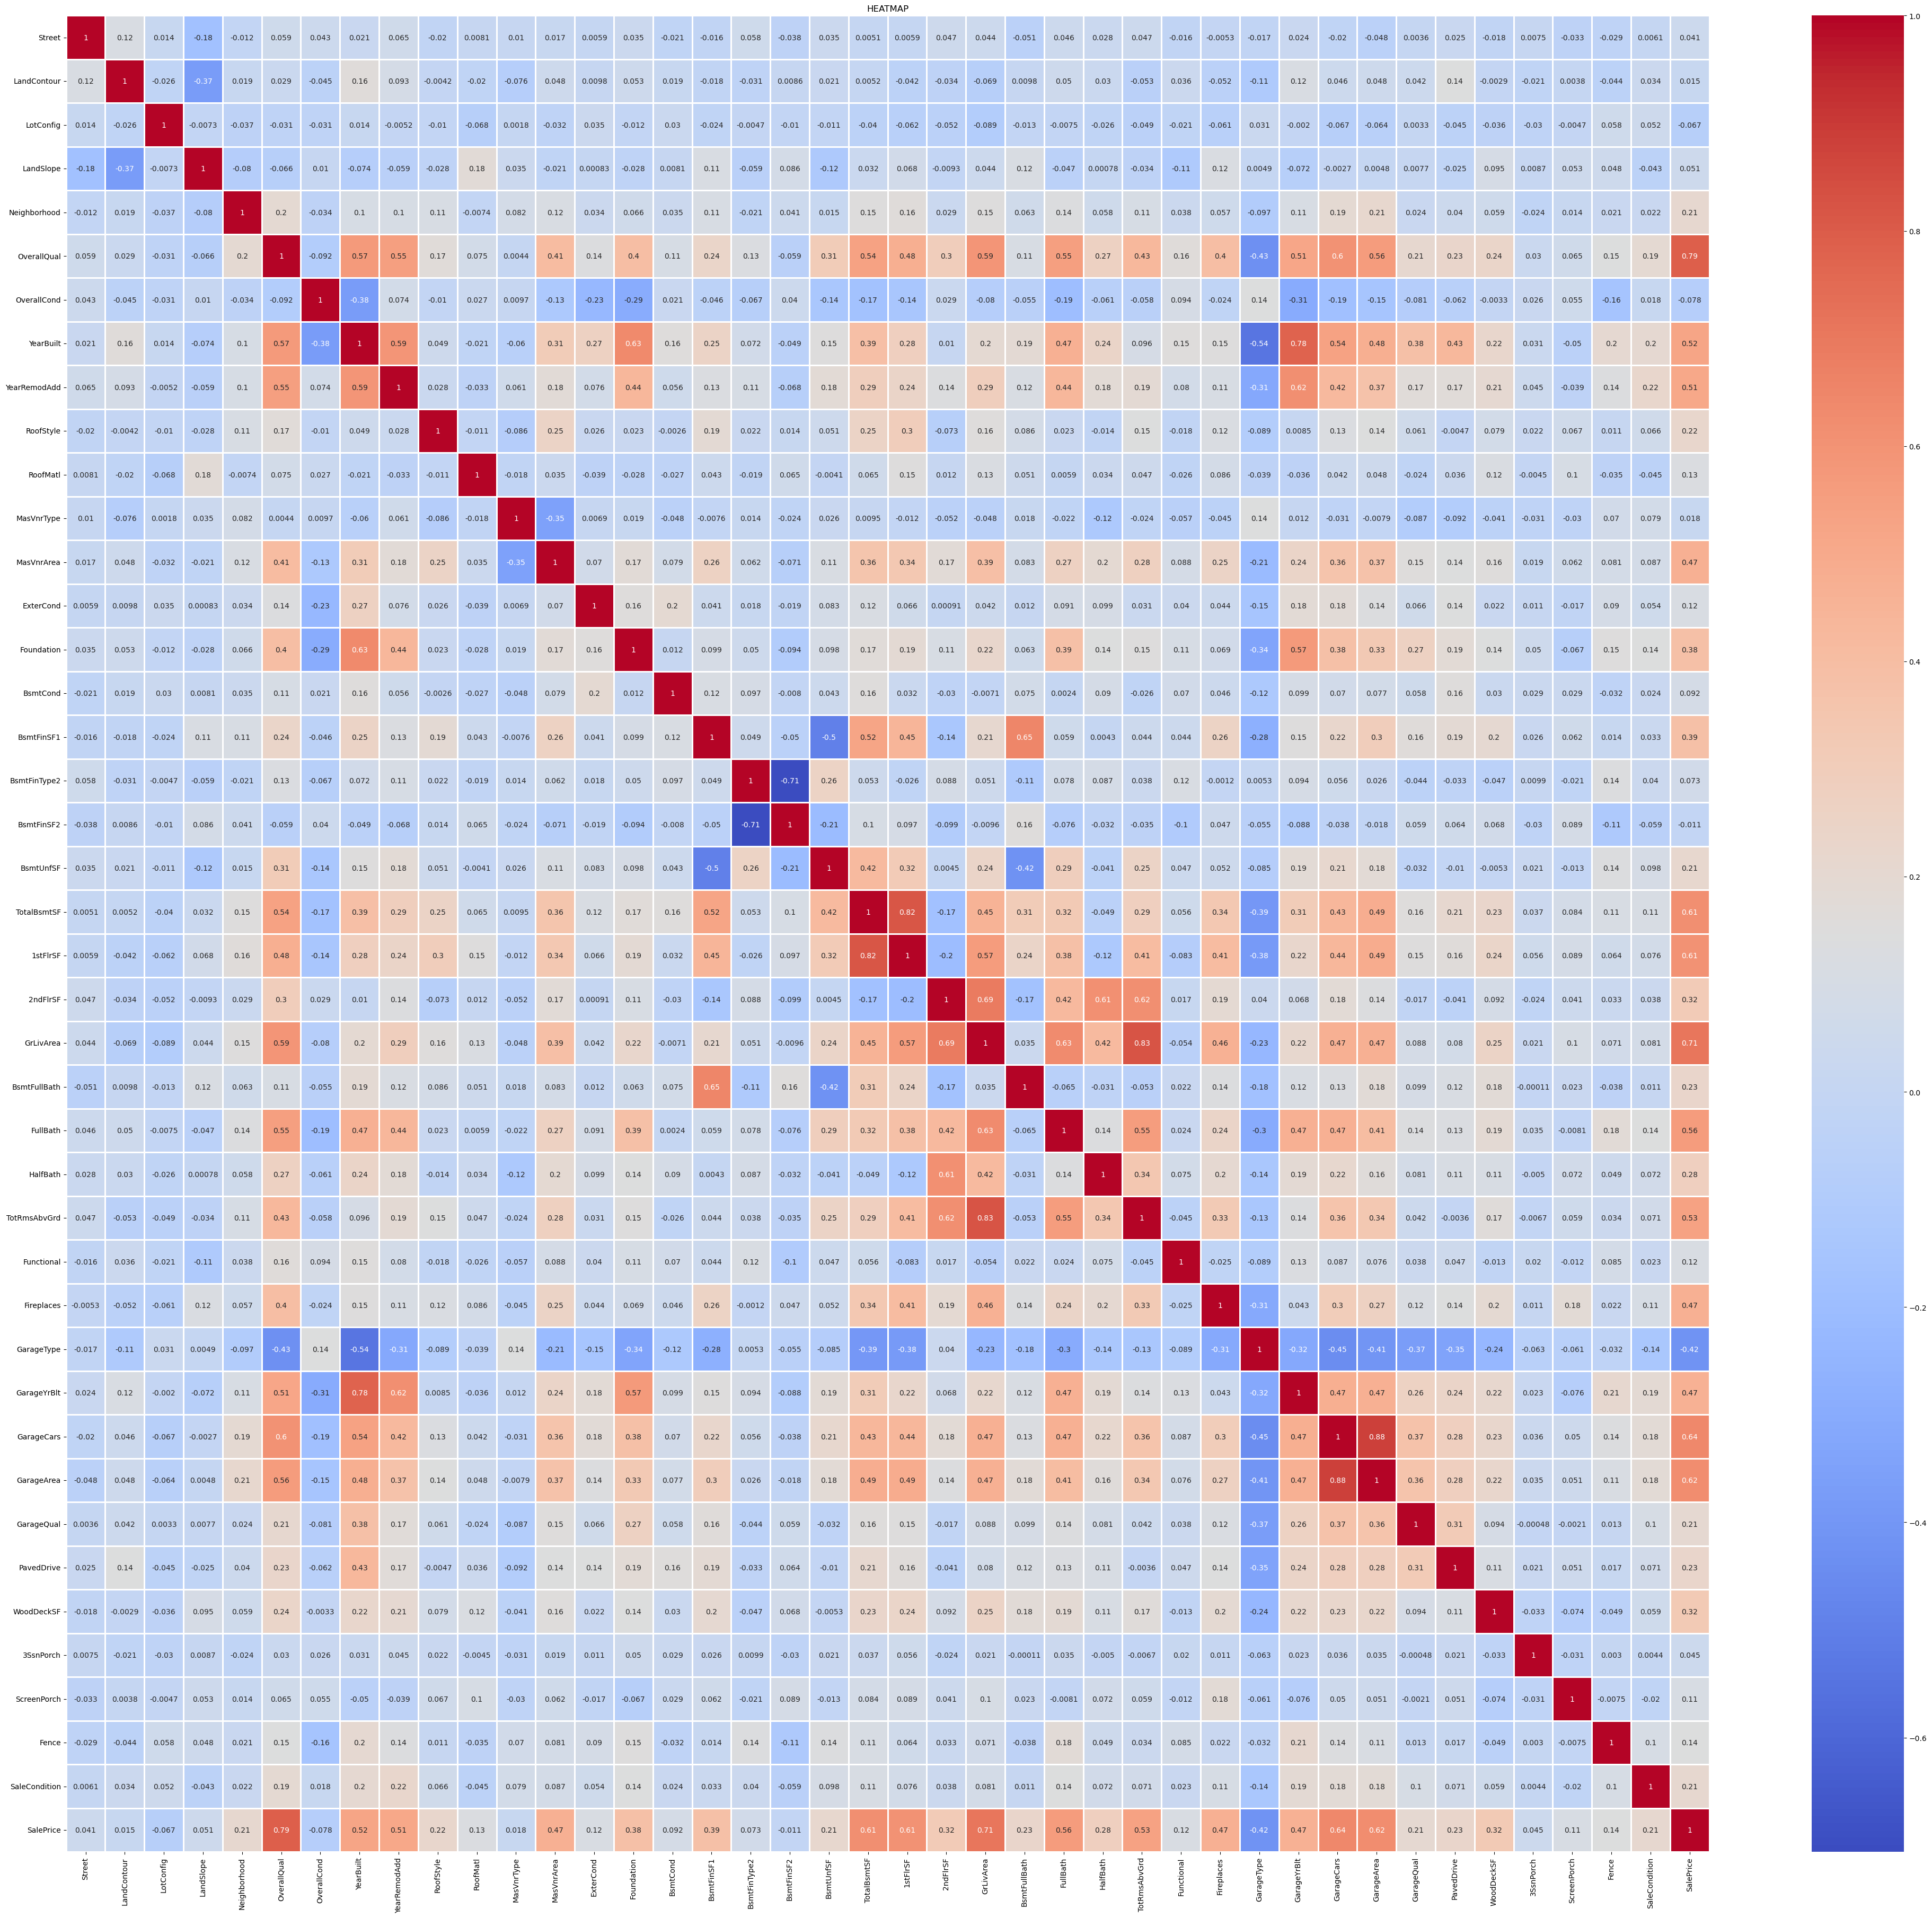

In [47]:
#Heatmap
plt.figure(figsize=(50,45))
heatmap=sns.heatmap(cr,linewidth=1,annot=True,cmap="coolwarm")
plt.title("HEATMAP")
plt.show()

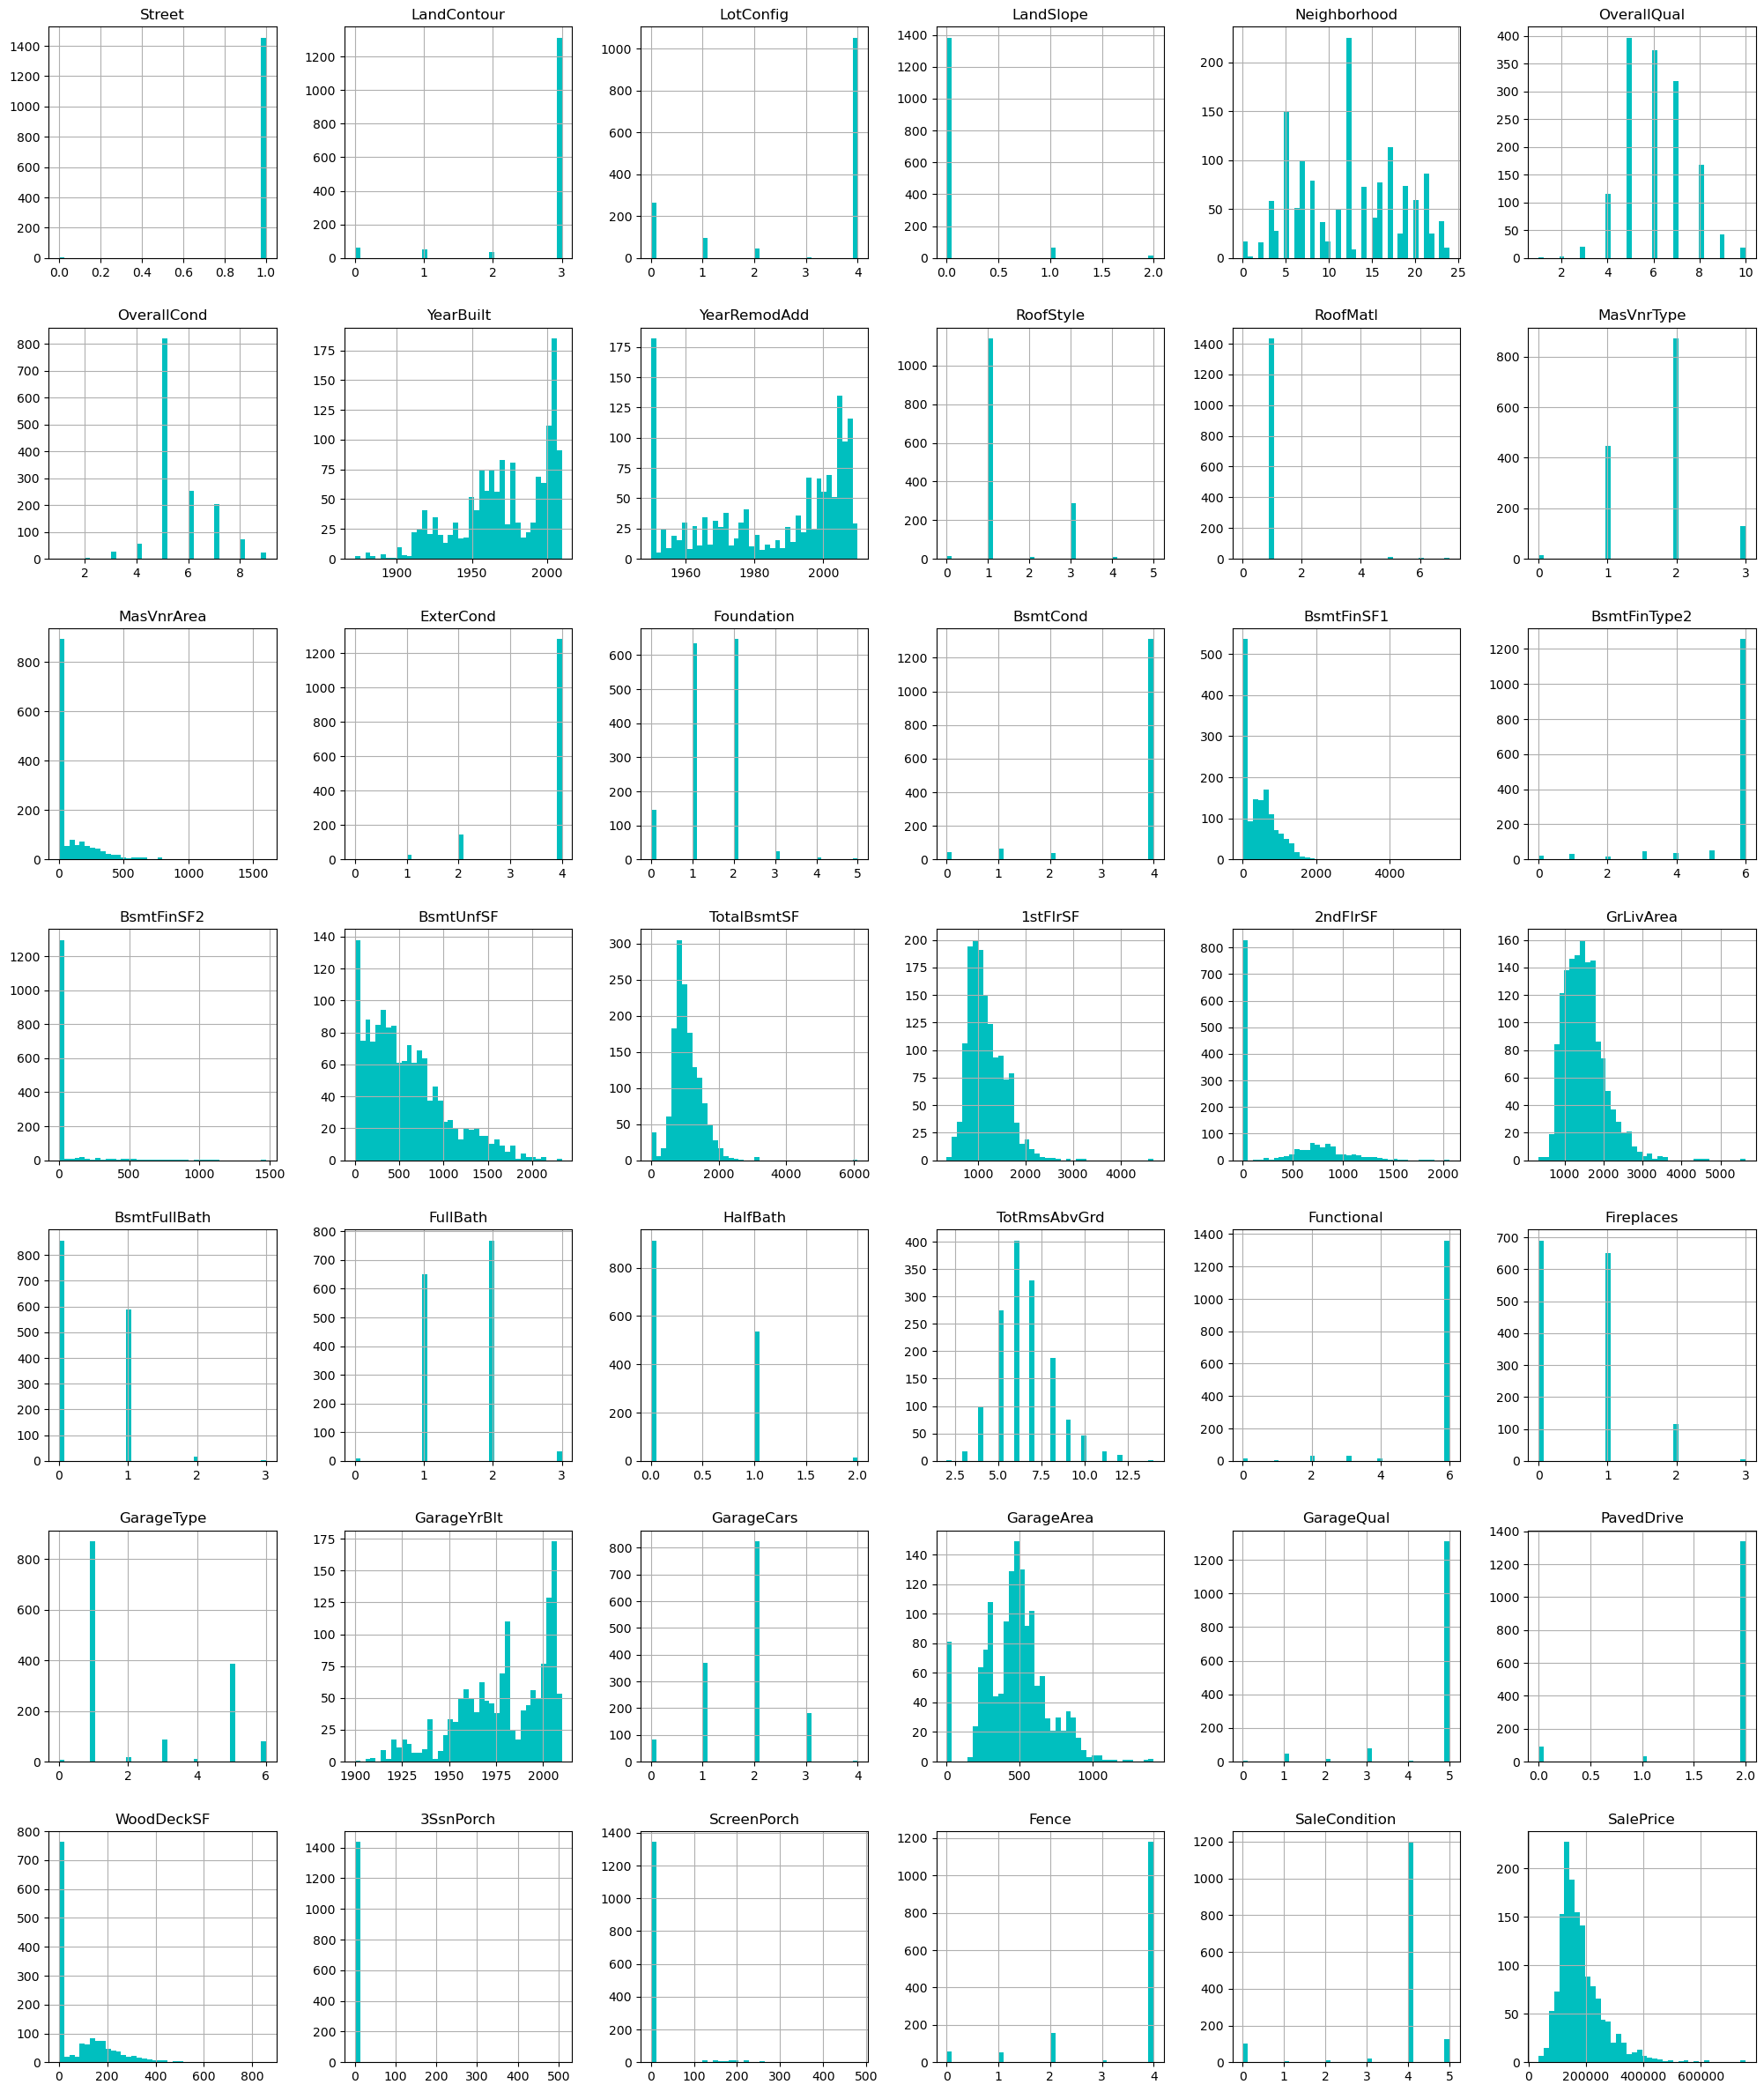

In [48]:
train.hist(bins=40, figsize=(25,30),color ='c')
plt.show()

In [49]:
train.columns

Index(['Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'Foundation',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'Fence',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# Outlier Treatment

In [50]:
train_num=train[["OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","FullBath","HalfBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","3SsnPorch","ScreenPorch","SalePrice"]]

<AxesSubplot:>

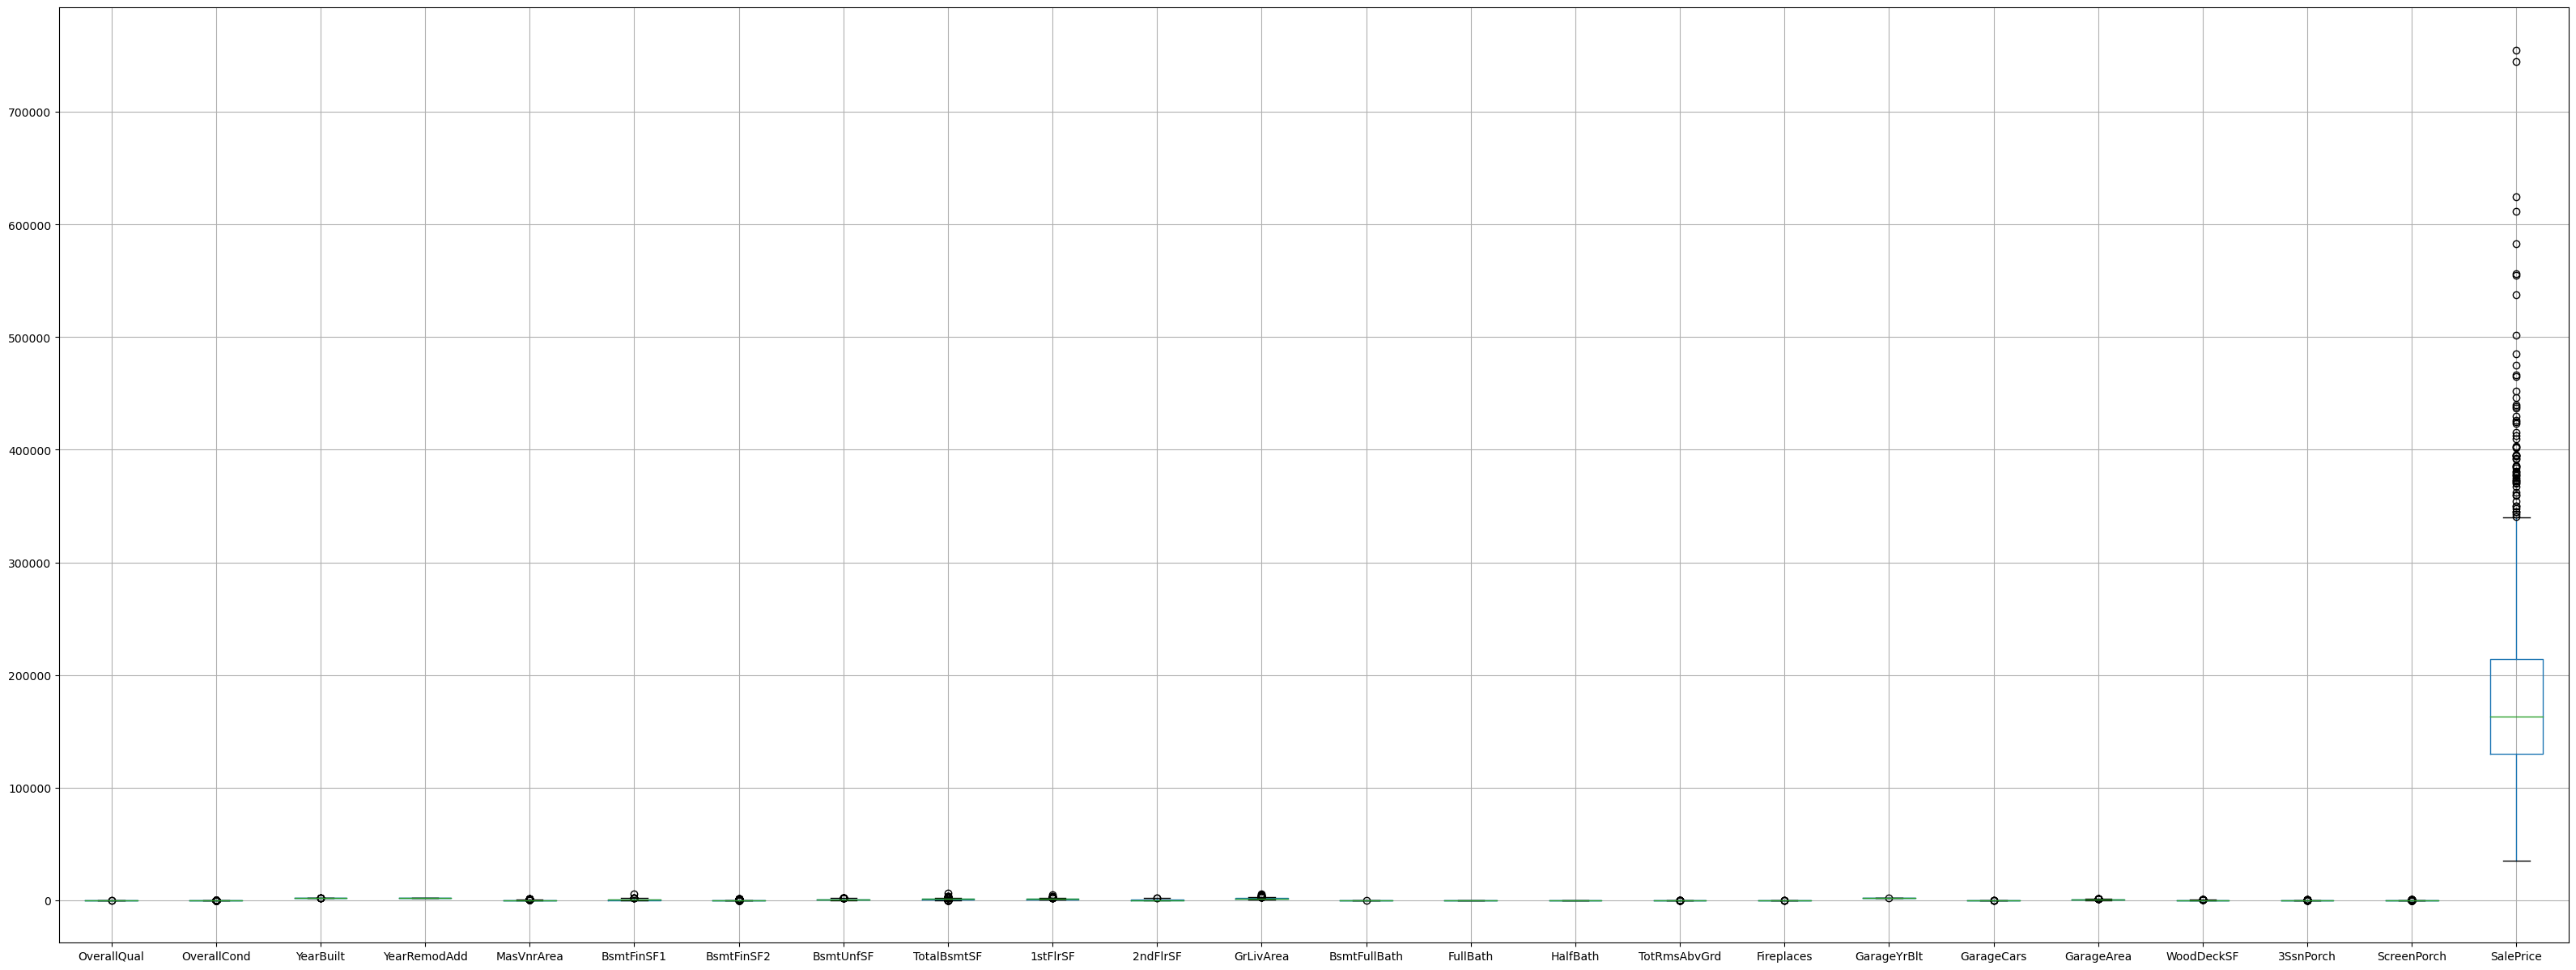

In [51]:
train_num.boxplot(figsize=(40,15))

In [52]:
train=train.rename(columns={"1stFlrSF":"FlrSF_1","2ndFlrSF":"FlrSF_2"})

# OverallQual

In [53]:
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:>

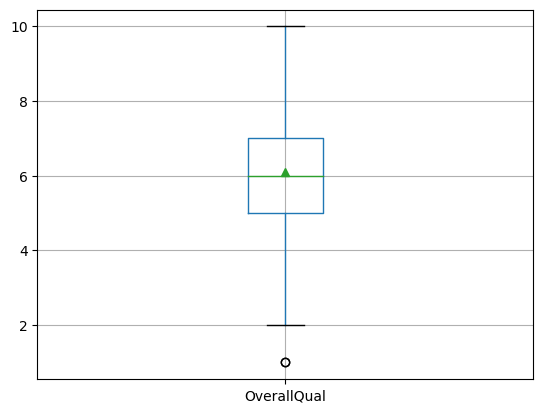

In [54]:
train.boxplot(column="OverallQual",showmeans=True)

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

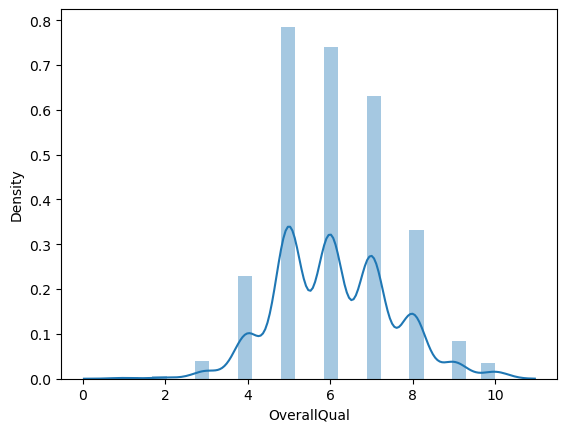

In [55]:
sns.distplot(train["OverallQual"]) 

In [56]:
train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [57]:
#in boxplot the outliers are on the minima,we have to calculate lower bound
l1=train["OverallQual"].mean()-3*train["OverallQual"].std()
l1

1.950325428268374

In [58]:
train.loc[train["OverallQual"]<1,"OverallQual"]=1           #treating the outliers

# OverallCond

In [59]:
train.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:>

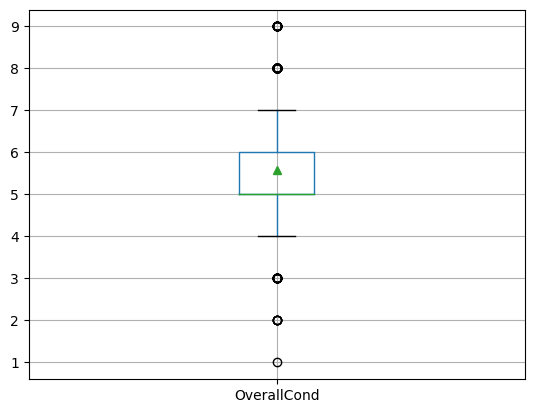

In [60]:
train.boxplot(column="OverallCond",showmeans=True)

<AxesSubplot:xlabel='OverallCond', ylabel='Density'>

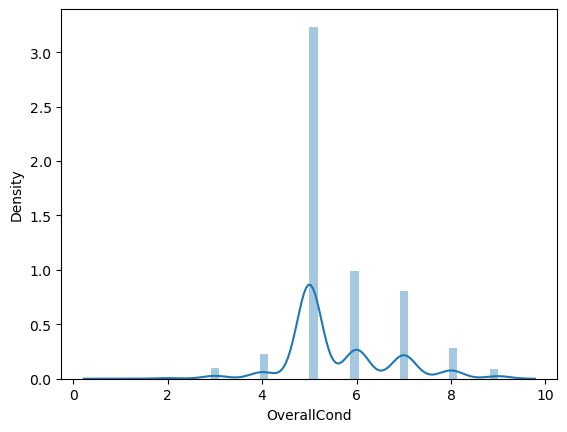

In [61]:
sns.distplot(train["OverallCond"]) 

In [62]:
train.OverallCond.describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [63]:
iqr3=train.OverallCond.quantile(0.75)-train.OverallCond.quantile(0.25)
iqr3

1.0

In [64]:
u3_i=train["OverallCond"].quantile(0.75)+3*iqr3   #upper bound
l3_i=train["OverallCond"].quantile(0.25)-3*iqr3   #lower bound
print(u3_i,l3_i)

9.0 2.0


In [65]:
train.loc[train["OverallCond"]>9,"OverallCond"]=9  #treating the outliers   #maxima
train.loc[train["OverallCond"]<2,"OverallCond"]=2  #treating the outliers   #minima

# YearBuilt

In [66]:
train.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

<AxesSubplot:>

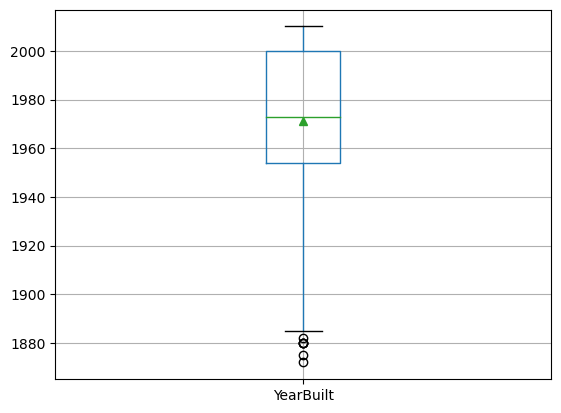

In [67]:
train.boxplot(column="YearBuilt",showmeans=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

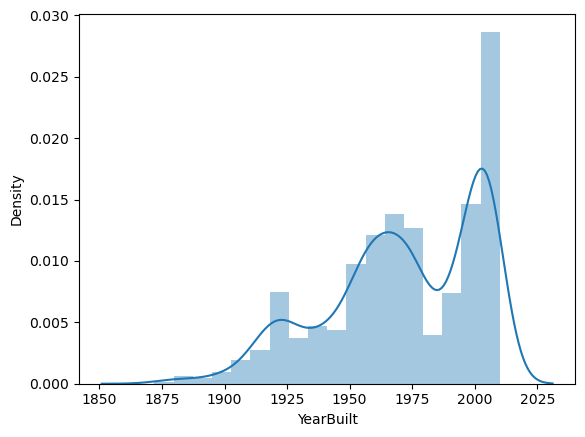

In [68]:
sns.distplot(train["YearBuilt"]) 

In [69]:
train.YearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [70]:
#in boxplot the outliers are on the minima,we have to calculate lower bound
l2=train["YearBuilt"].mean()-3*train["YearBuilt"].std()
l2

1880.6590960916024

In [71]:
train.loc[train["YearBuilt"]<1880,"YearBuilt"]=1880        #treating the outliers

# MasVnrArea

In [72]:
train.MasVnrArea.value_counts()

0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

<AxesSubplot:>

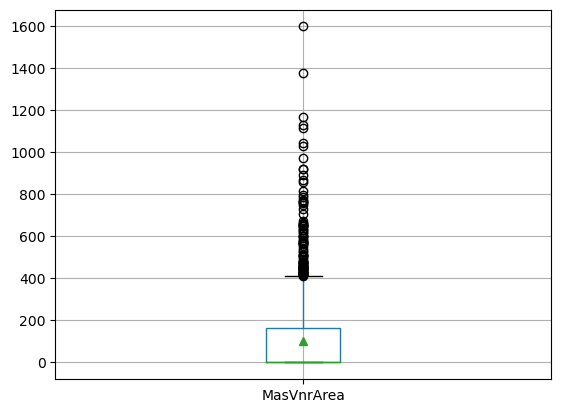

In [73]:
train.boxplot(column="MasVnrArea",showmeans=True)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

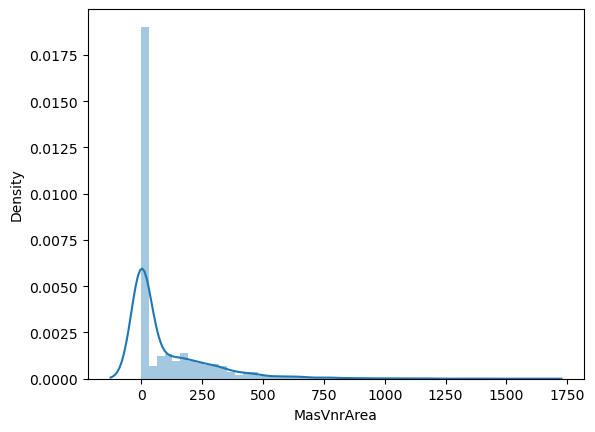

In [74]:
sns.distplot(train["MasVnrArea"]) 

In [75]:
train.MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [76]:
iqr4=train.MasVnrArea.quantile(0.75)-train.MasVnrArea.quantile(0.25)
iqr4

164.25

In [77]:
u4_i=train["MasVnrArea"].quantile(0.75)+3*iqr4   #upper bound
print(u4_i)

657.0


In [78]:
train.loc[train["MasVnrArea"]>657,"MasVnrArea"]=657  #treating the outliers   #maxima

# BsmtFinSF1

In [79]:
train.BsmtFinSF1.value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

<AxesSubplot:>

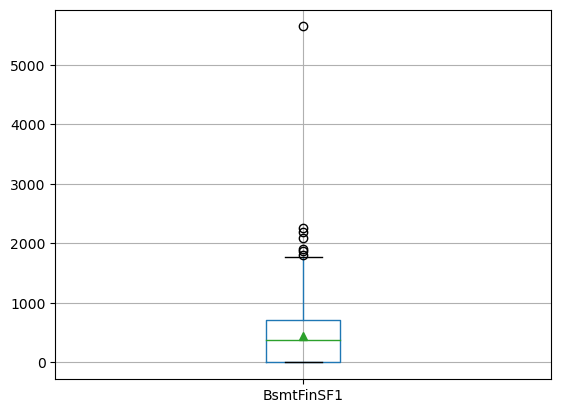

In [80]:
train.boxplot(column="BsmtFinSF1",showmeans=True)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

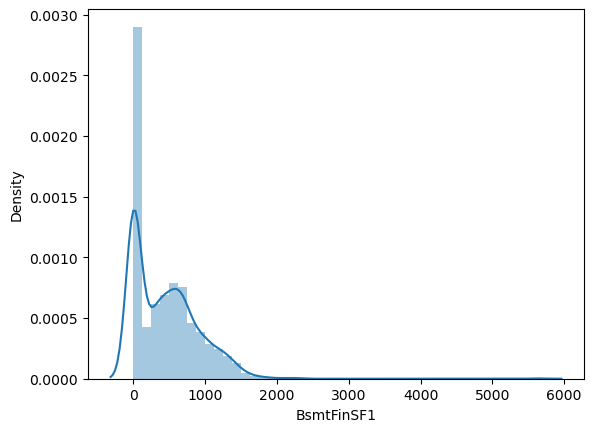

In [81]:
sns.distplot(train["BsmtFinSF1"]) 

In [82]:
train.BsmtFinSF1.describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [83]:
iqr5=train.BsmtFinSF1.quantile(0.75)-train.BsmtFinSF1.quantile(0.25)
iqr5

712.25

In [84]:
u5_i=train["BsmtFinSF1"].quantile(0.75)+3*iqr5   #upper bound
print(u5_i)

2849.0


In [85]:
train.loc[train["BsmtFinSF1"]>2849,"BsmtFinSF1"]=2849  #treating the outliers   #maxima

# BsmtUnfSF

In [86]:
train.BsmtUnfSF.value_counts()

0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64

<AxesSubplot:>

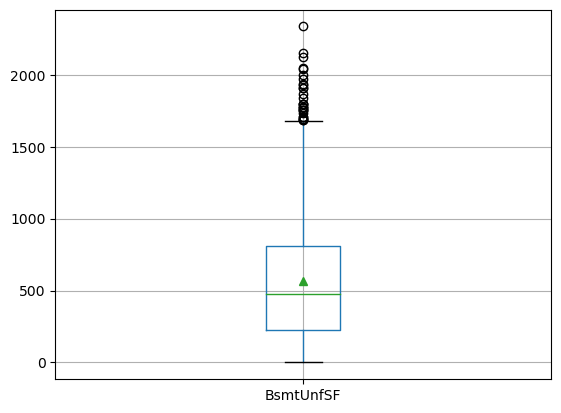

In [87]:
train.boxplot(column="BsmtUnfSF",showmeans=True)

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

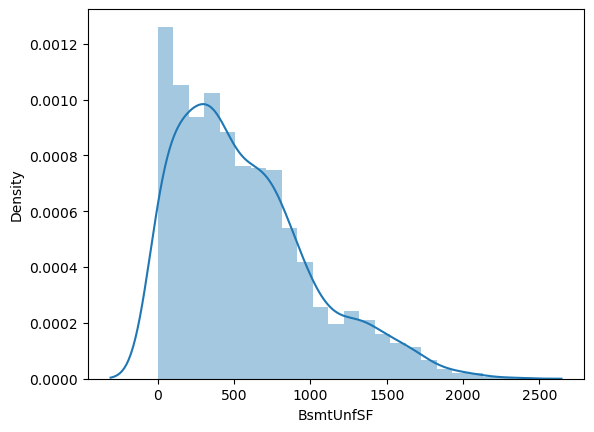

In [88]:
sns.distplot(train["BsmtUnfSF"]) 

In [89]:
train.BsmtUnfSF.describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [90]:
#in boxplot the outliers are on the maxima,we have to calculate upper bound
u2=train["BsmtUnfSF"].mean()+3*train["BsmtUnfSF"].std()
u2

1892.8412768362068

In [91]:
train.loc[train["BsmtUnfSF"]>1892,"BsmtUnfSF"]=1892      #treating the outliers

# TotalBsmtSF

In [92]:
train.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

<AxesSubplot:>

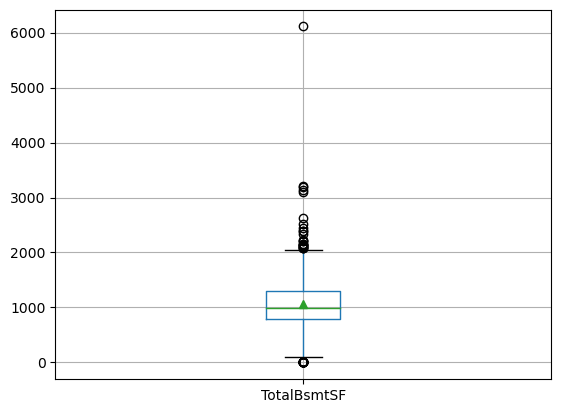

In [93]:
train.boxplot(column="TotalBsmtSF",showmeans=True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

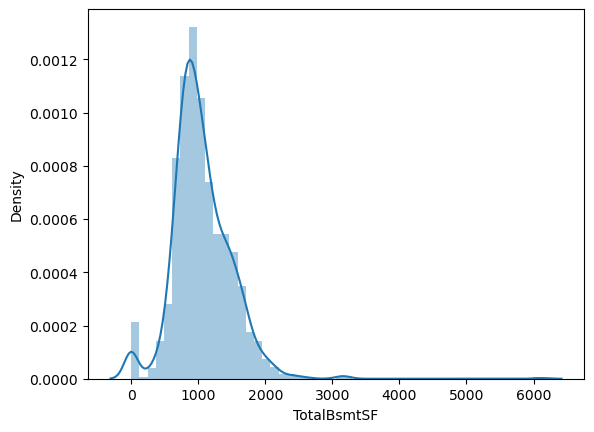

In [94]:
sns.distplot(train["TotalBsmtSF"]) 

In [95]:
train.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [96]:
iqr6=train.TotalBsmtSF.quantile(0.75)-train.TotalBsmtSF.quantile(0.25)
iqr6

502.5

In [97]:
u6_i=train["TotalBsmtSF"].quantile(0.75)+3*iqr6   #upper bound
l6_i=train["TotalBsmtSF"].quantile(0.25)-3*iqr6   #lower bound
print(u6_i,l6_i)

2805.75 -711.75


In [98]:
train.loc[train["TotalBsmtSF"]>2805,"TotalBsmtSF"]=2805  #treating the outliers   #maxima
train.loc[train["TotalBsmtSF"]<-711,"TotalBsmtSF"]=-711  #treating the outliers   #minima

# 1stFlrSF

In [99]:
train.FlrSF_1.value_counts()

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: FlrSF_1, Length: 753, dtype: int64

<AxesSubplot:>

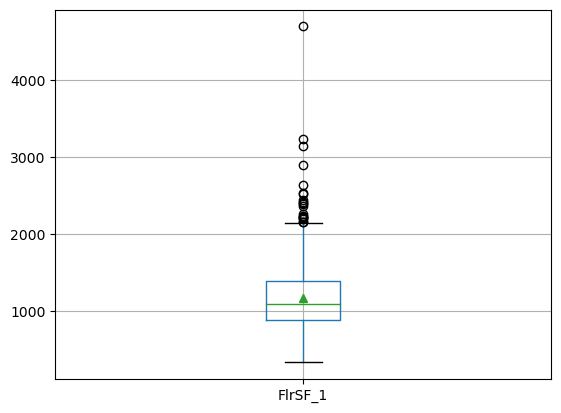

In [100]:
train.boxplot(column="FlrSF_1",showmeans=True)

<AxesSubplot:xlabel='FlrSF_1', ylabel='Density'>

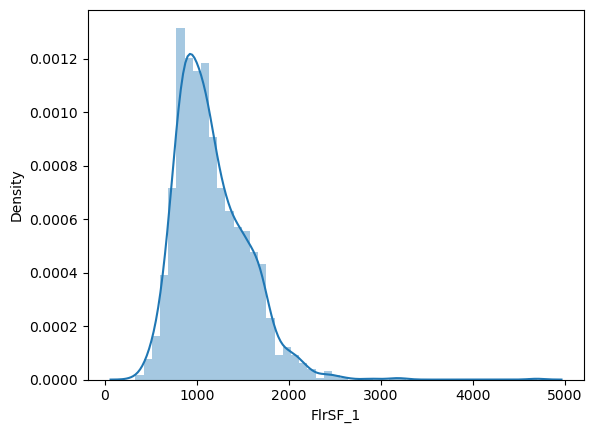

In [101]:
sns.distplot(train["FlrSF_1"]) 

In [102]:
train.FlrSF_1.describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: FlrSF_1, dtype: float64

In [103]:
iqr7=train.FlrSF_1.quantile(0.75)-train.FlrSF_1.quantile(0.25)
iqr7

509.25

In [104]:
u7_i=train["FlrSF_1"].quantile(0.75)+3*iqr7   #upper bound
print(u7_i)

2919.0


In [105]:
train.loc[train["FlrSF_1"]>2919,"FlrSF_1"]=2919  #treating the outliers   #maxima

# FlrSF_2

In [106]:
train.FlrSF_2.value_counts()

0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: FlrSF_2, Length: 417, dtype: int64

<AxesSubplot:>

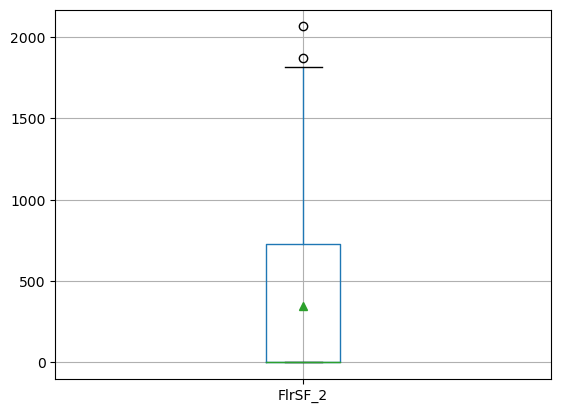

In [107]:
train.boxplot(column="FlrSF_2",showmeans=True)

<AxesSubplot:xlabel='FlrSF_2', ylabel='Density'>

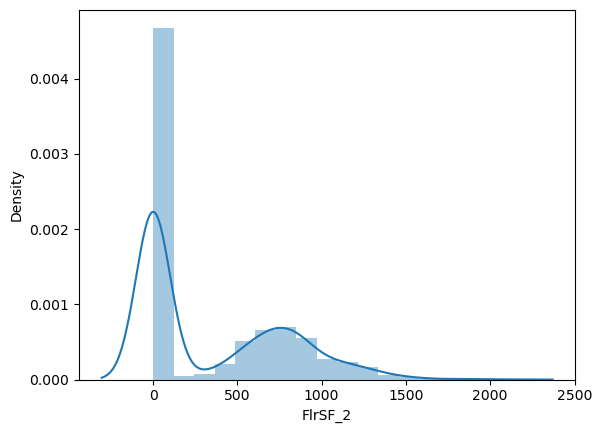

In [108]:
sns.distplot(train["FlrSF_2"]) 

In [109]:
train.FlrSF_2.describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: FlrSF_2, dtype: float64

In [110]:
iqr8=train.FlrSF_2.quantile(0.75)-train.FlrSF_2.quantile(0.25)
iqr8

728.0

In [111]:
u8_i=train["FlrSF_2"].quantile(0.75)+3*iqr8   #upper bound
print(u8_i)

2912.0


In [112]:
train.loc[train["FlrSF_2"]>2912,"FlrSF_2"]=2912  #treating the outliers   #maxima

# TotRmsAbvGrd

In [113]:
train.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

<AxesSubplot:>

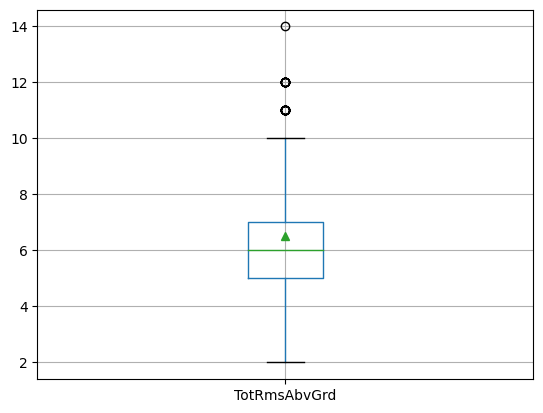

In [114]:
train.boxplot(column="TotRmsAbvGrd",showmeans=True)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Density'>

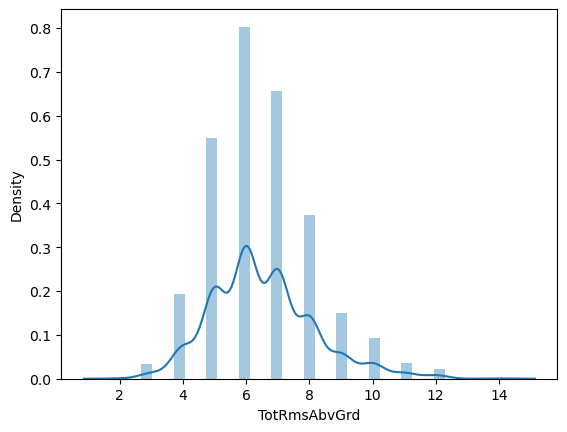

In [115]:
sns.distplot(train["TotRmsAbvGrd"]) 

In [116]:
train.TotRmsAbvGrd.describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In [117]:
#in boxplot the outliers are on the maxima,we have to calculate upper bound
u3=train["TotRmsAbvGrd"].mean()+3*train["TotRmsAbvGrd"].std()
u3

11.393988090930275

In [118]:
train.loc[train["TotRmsAbvGrd"]>11,"TotRmsAbvGrd"]=11      #treating the outliers

# GarageYrBlt

In [119]:
train.GarageYrBlt.value_counts()

1980.0    96
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1900.0     1
1906.0     1
1908.0     1
1927.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:>

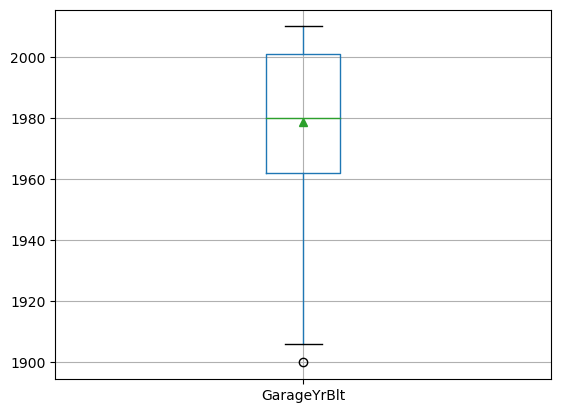

In [120]:
train.boxplot(column="GarageYrBlt",showmeans=True)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

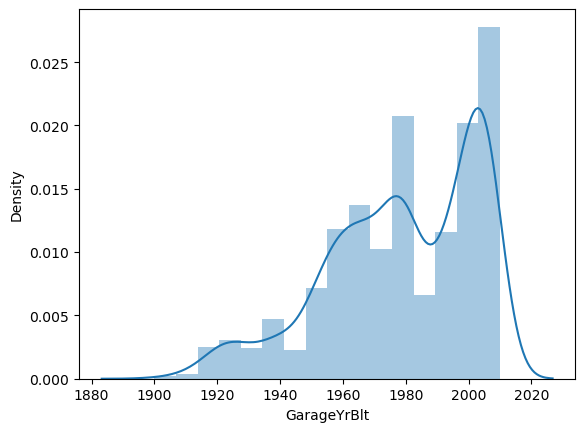

In [121]:
sns.distplot(train["GarageYrBlt"]) 

In [122]:
train.GarageYrBlt.describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [123]:
#in boxplot the outliers are on the minima,we have to calculate lower bound
l3=train["GarageYrBlt"].mean()-3*train["GarageYrBlt"].std()
l3

1906.5979765090879

In [124]:
train.loc[train["GarageYrBlt"]<1906,"GarageYrBlt"]=1906      #treating the outliers

# GarageArea

In [125]:
train.GarageArea.value_counts()

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

<AxesSubplot:>

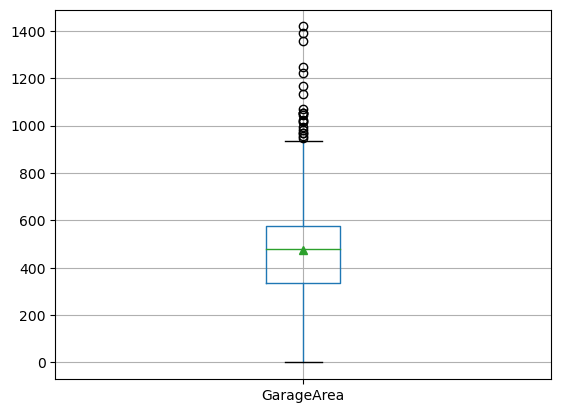

In [126]:
train.boxplot(column="GarageArea",showmeans=True)

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

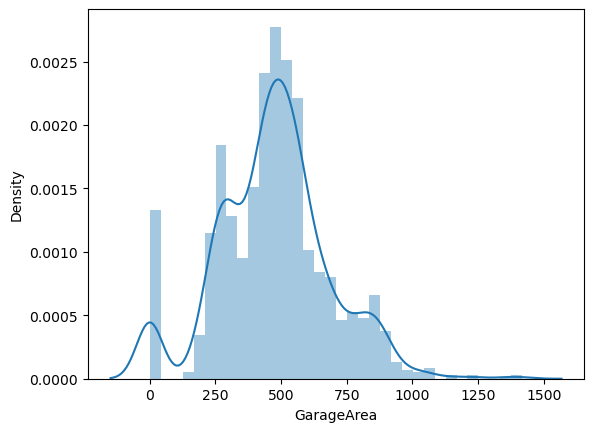

In [127]:
sns.distplot(train["GarageArea"]) 

In [128]:
train.GarageArea.describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [129]:
#in boxplot the outliers are on the minima,we have to calculate lower bound
u4=train["GarageArea"].mean()+3*train["GarageArea"].std()
u4

1114.3946613464436

In [130]:
train.loc[train["GarageArea"]>1114,"GarageArea"]=1114      #treating the outliers

# WoodDeckSF

In [131]:
train.WoodDeckSF.value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64

<AxesSubplot:>

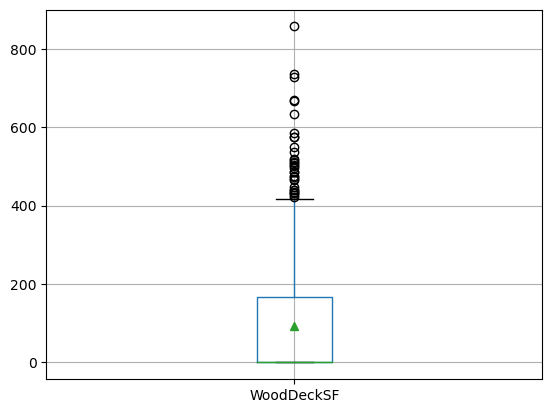

In [132]:
train.boxplot(column="WoodDeckSF",showmeans=True)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Density'>

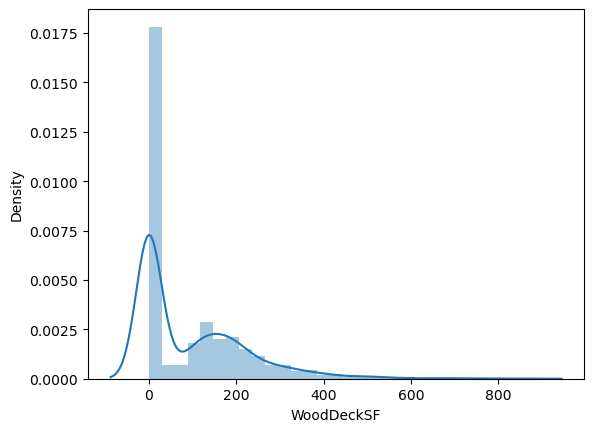

In [133]:
sns.distplot(train["WoodDeckSF"]) 

In [134]:
train.WoodDeckSF.describe()

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [135]:
iqr11=train.WoodDeckSF.quantile(0.75)-train.WoodDeckSF.quantile(0.25)
iqr11

168.0

In [136]:
u11_i=train["WoodDeckSF"].quantile(0.75)+3*iqr11   #upper bound
print(u11_i)

672.0


In [137]:
train.loc[train["WoodDeckSF"]>672.0,"WoodDeckSF"]=672.0  #treating the outliers   #maxima

# SalePrice

In [138]:
train.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

<AxesSubplot:>

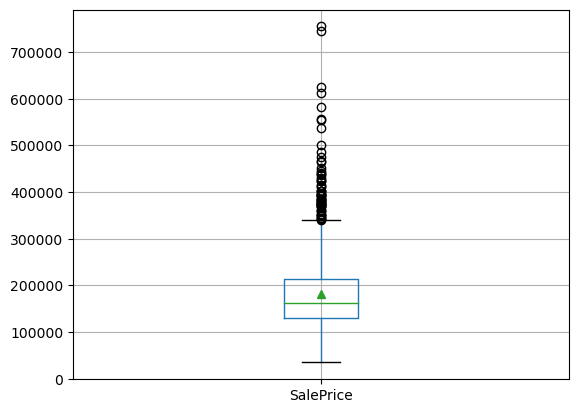

In [139]:
train.boxplot(column="SalePrice",showmeans=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

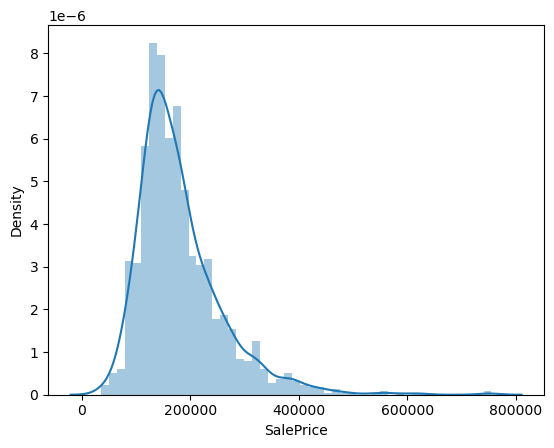

In [140]:
sns.distplot(train["SalePrice"]) 

In [141]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [142]:
iqr14=train.SalePrice.quantile(0.75)-train.SalePrice.quantile(0.25)
iqr14

84025.0

In [143]:
u14_i=train["SalePrice"].quantile(0.75)+3*iqr14   #upper bound
print(u14_i)

466075.0


In [144]:
train.loc[train["SalePrice"]>466075,"SalePrice"]=466075  #treating the outliers   #maxima

# GrLivArea

In [145]:
train.GrLivArea.value_counts()

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

<AxesSubplot:>

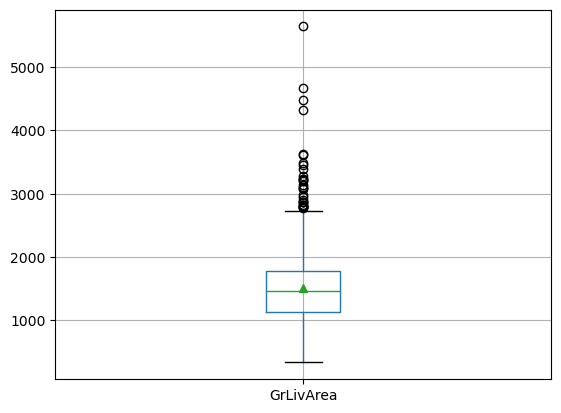

In [146]:
train.boxplot(column="GrLivArea",showmeans=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

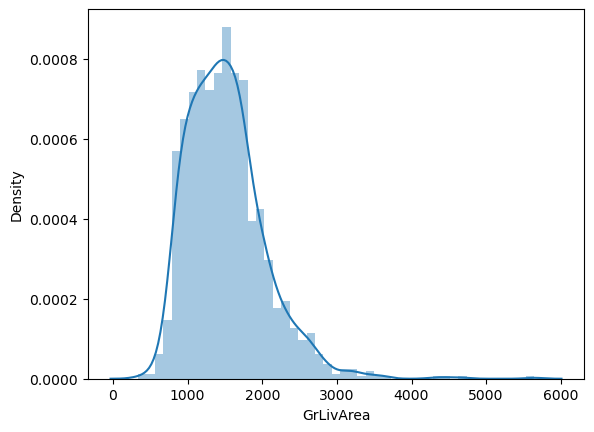

In [147]:
sns.distplot(train["GrLivArea"]) 

In [148]:
train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [149]:
iqr15=train.GrLivArea.quantile(0.75)-train.GrLivArea.quantile(0.25)
iqr15

647.25

In [150]:
u15_i=train["GrLivArea"].quantile(0.75)+3*iqr15   #upper bound
print(u15_i)

3718.5


In [151]:
train.loc[train["GrLivArea"]>3718,"GrLivArea"]=3718  #treating the outliers   #maxima

# Skewness

In [152]:
train_num1=train_num.drop(["YearRemodAdd","FullBath","HalfBath","GarageCars","3SsnPorch","ScreenPorch"],axis=1)

OverallQual
0.2167209765258641


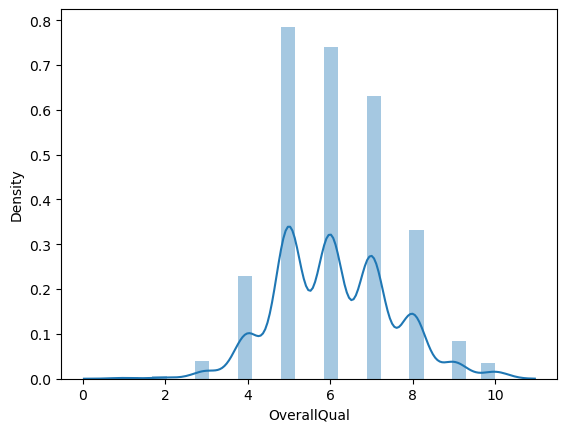

OverallCond
0.6923552135520978


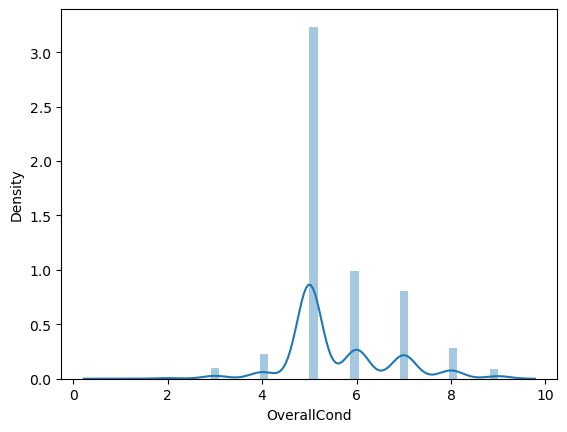

YearBuilt
-0.612830724202899


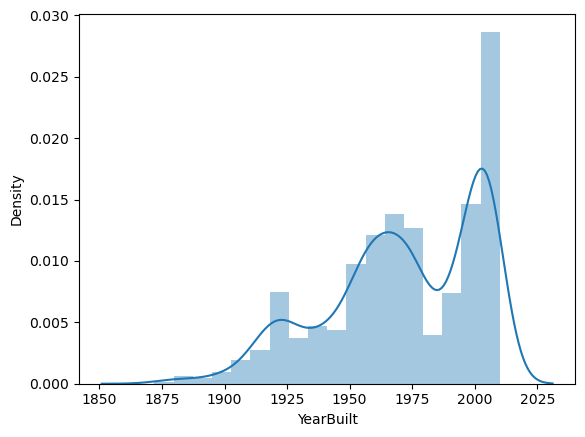

MasVnrArea
2.6748646898037354


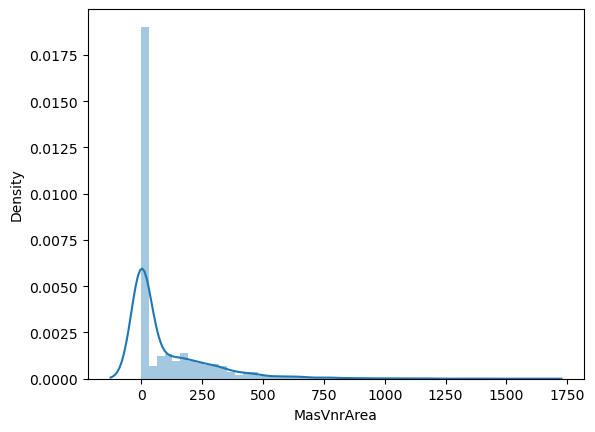

BsmtFinSF1
1.6837708962341815


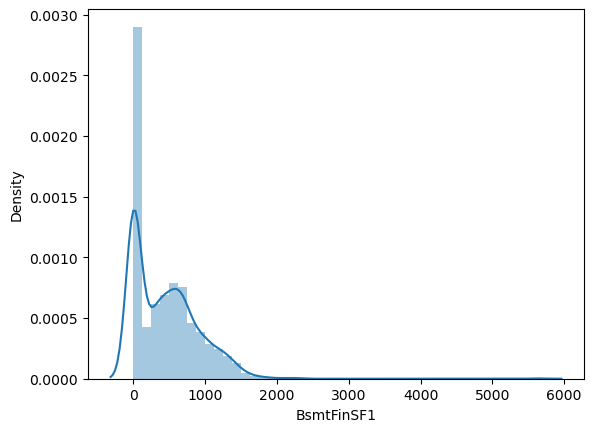

BsmtFinSF2
4.250888017057445


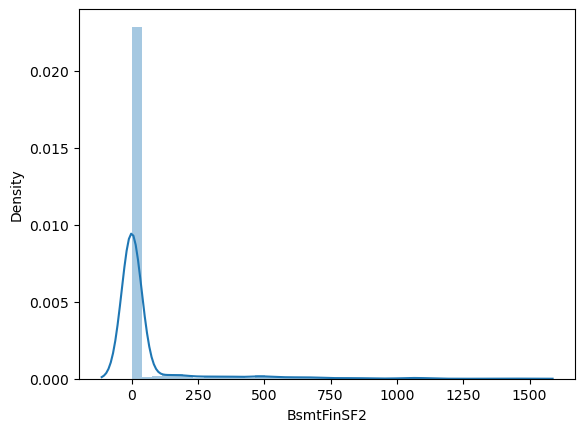

BsmtUnfSF
0.9193227015582005


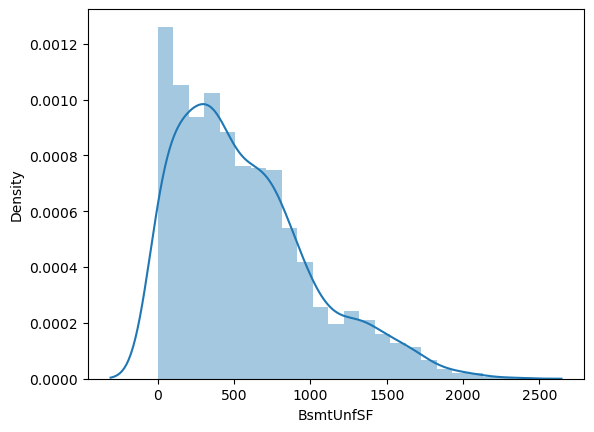

TotalBsmtSF
1.522688086978629


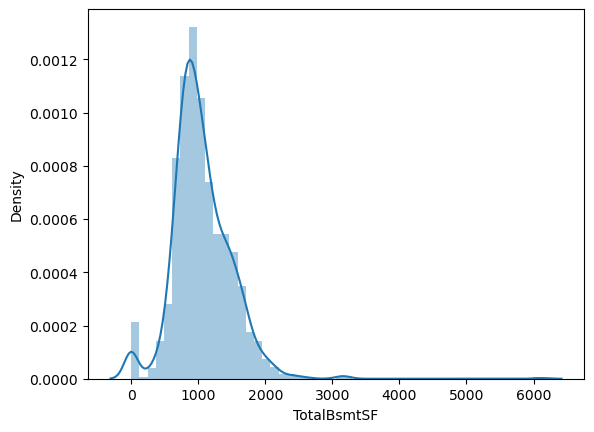

1stFlrSF
1.3753417421837937


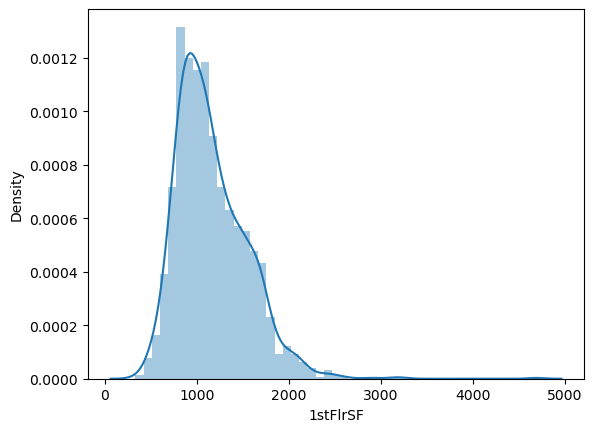

2ndFlrSF
0.8121942731961613


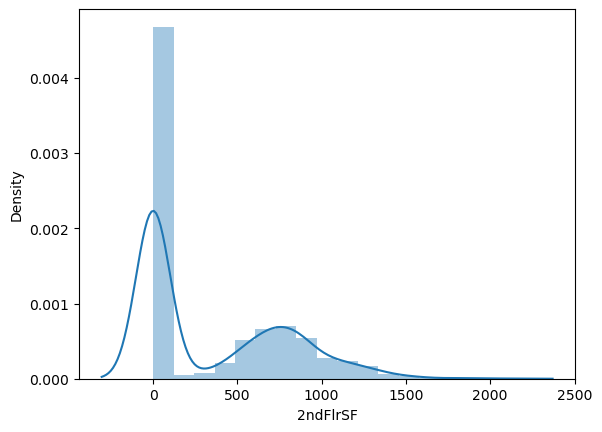

GrLivArea
1.365155954773434


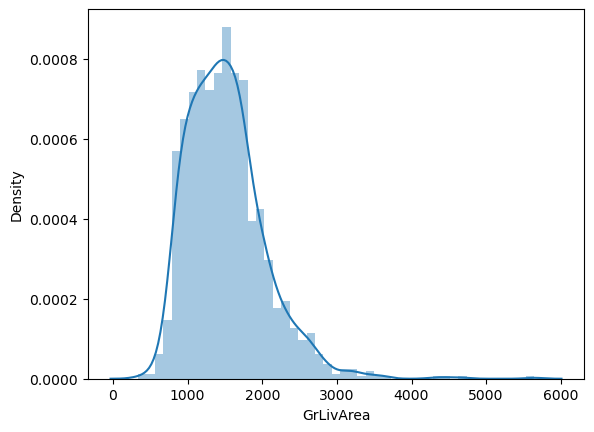

BsmtFullBath
0.5954540376067279


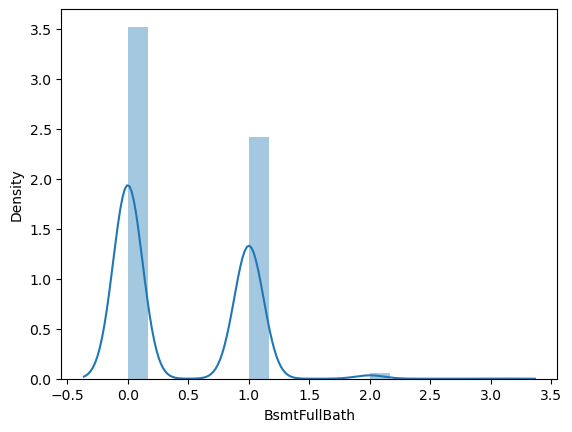

TotRmsAbvGrd
0.6756457673102017


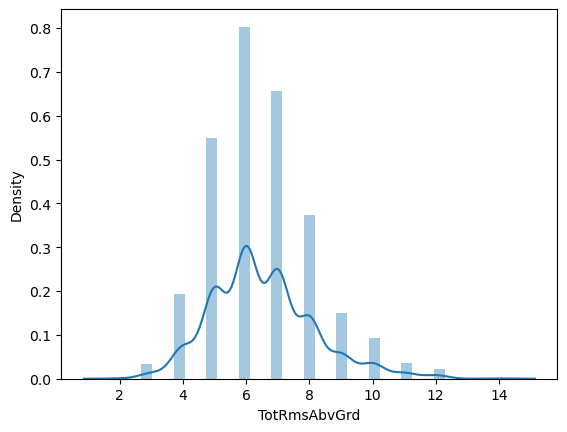

Fireplaces
0.6488976310170327


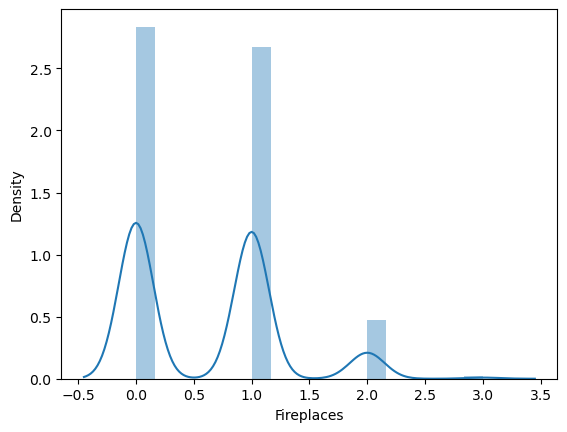

GarageYrBlt
-0.6776358326947384


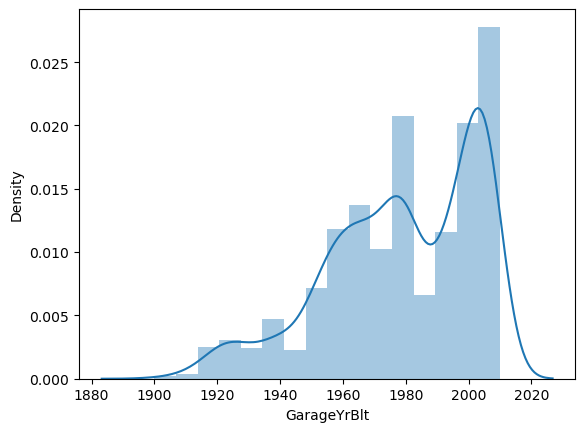

GarageArea
0.1797959420587727


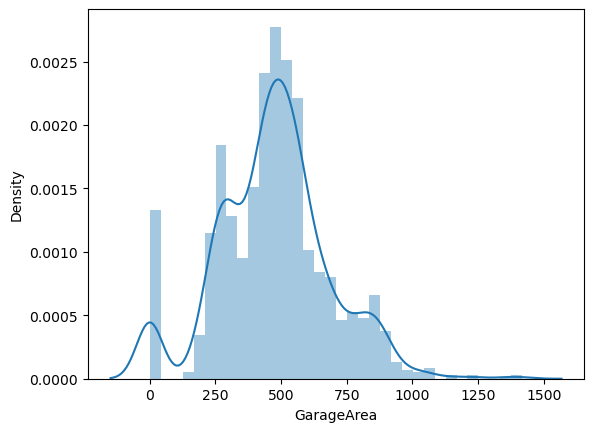

WoodDeckSF
1.5397916998042025


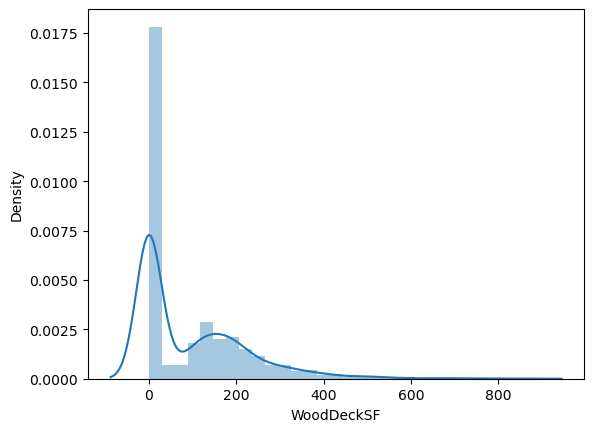

SalePrice
1.880940746034036


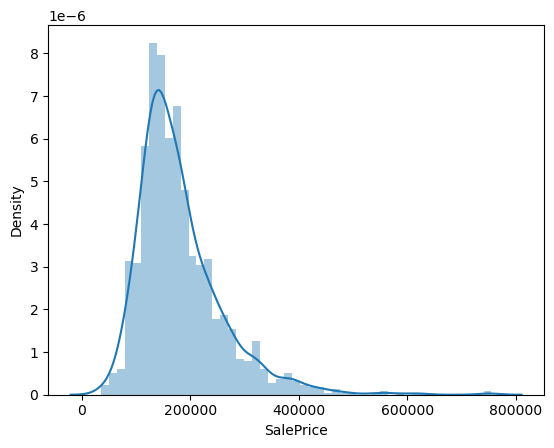

In [153]:
for col in train_num1:
    print(col)
    print(skew(train_num1[col]))
    
    plt.figure()
    sns.distplot(train_num1[col])
    plt.show()

In [154]:
train_num1.skew()

OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
MasVnrArea      2.677616
BsmtFinSF1      1.685503
BsmtFinSF2      4.255261
BsmtUnfSF       0.920268
TotalBsmtSF     1.524255
1stFlrSF        1.376757
2ndFlrSF        0.813030
GrLivArea       1.366560
BsmtFullBath    0.596067
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageYrBlt    -0.678333
GarageArea      0.179981
WoodDeckSF      1.541376
SalePrice       1.882876
dtype: float64

In [155]:
train["MasVnrArea"]=np.cbrt(train["MasVnrArea"])

In [156]:
train["BsmtFinSF1"]=np.cbrt(train["BsmtFinSF1"])

In [157]:
train["BsmtFinSF2"]=np.cbrt(train["BsmtFinSF2"])

In [158]:
train["TotalBsmtSF"]=np.cbrt(train["TotalBsmtSF"])

In [159]:
train["FlrSF_1"]=np.cbrt(train["FlrSF_1"])

In [160]:
train["GrLivArea"]=np.cbrt(train["GrLivArea"])

In [161]:
train["WoodDeckSF"]=np.cbrt(train["WoodDeckSF"])

In [162]:
train["SalePrice"]=np.cbrt(train["SalePrice"])

In [163]:
train.skew()

Street          -15.518770
LandContour      -3.162499
LotConfig        -1.135632
LandSlope         4.813682
Neighborhood      0.042122
OverallQual       0.216944
OverallCond       0.721042
YearBuilt        -0.607314
YearRemodAdd     -0.503562
RoofStyle         1.473796
RoofMatl          8.109402
MasVnrType       -0.073627
MasVnrArea        0.661348
ExterCond        -2.565305
Foundation        0.091217
BsmtCond         -2.942015
BsmtFinSF1       -0.366227
BsmtFinType2     -3.176775
BsmtFinSF2        2.731634
BsmtUnfSF         0.870280
TotalBsmtSF      -2.973983
FlrSF_1           0.325564
FlrSF_2           0.813030
GrLivArea         0.266960
BsmtFullBath      0.596067
FullBath          0.036562
HalfBath          0.675897
TotRmsAbvGrd      0.539774
Functional       -4.084958
Fireplaces        0.649565
GarageType        0.642558
GarageYrBlt      -0.674829
GarageCars       -0.342549
GarageArea        0.054801
GarageQual       -3.251921
PavedDrive       -3.308938
WoodDeckSF        0.270440
3

# Model on Train data to check performance

In [164]:
x1=train.iloc[:,0:-1]
y1=train.iloc[:,-1]

In [165]:
x1.head()

,Street,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,3SsnPorch,ScreenPorch,Fence,SaleCondition
0,1,3,4,0,5,7,5,2003,2003,1,...,2003.0,2,548,5,2,0.000000,0,0,4,4
1,1,3,2,0,24,6,8,1976,1976,1,...,1976.0,2,460,5,2,6.679420,0,0,4,4
2,1,3,4,0,5,7,5,2001,2002,1,...,2001.0,2,608,5,2,0.000000,0,0,4,4
3,1,3,0,0,6,7,5,1915,1970,1,...,1998.0,3,642,5,2,0.000000,0,0,4,0
4,1,3,2,0,15,8,5,2000,2000,1,...,2000.0,3,836,5,2,5.768998,0,0,4,4


In [166]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [167]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((1168, 41), (292, 41), (1168,), (292,))

In [168]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [169]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [170]:
lr_pred=lr.predict(x1_test)
#lr_pred

In [171]:
lr.intercept_

-124.87492527552905

In [172]:
lr.coef_

array([ 3.12336507e+00,  2.09513007e-01, -3.69792613e-02,  1.42427977e+00,
        1.72123607e-02,  1.35037503e+00,  6.82990133e-01,  4.06966279e-02,
        2.26774640e-02,  1.22170853e-01,  1.61257459e-01,  3.29727513e-01,
        1.71717943e-02,  1.41674594e-01,  3.39876102e-01,  2.22540646e-02,
        9.65652178e-02, -1.39955458e-01, -7.38085136e-02, -2.31899472e-04,
        2.93645637e-01,  6.48229262e-01,  2.86193931e-05,  1.91229887e+00,
        7.55774104e-01, -1.27332215e-01,  1.18462087e-01,  2.03092120e-02,
        4.58026441e-01,  7.61911660e-01, -1.45678656e-02, -5.86316318e-04,
        6.56495201e-01,  1.92070780e-03, -7.17334693e-02,  2.78479016e-02,
        7.64296593e-02,  3.26051042e-03,  2.98127789e-03,  1.46732806e-01,
        3.77961435e-01])

In [173]:
R1=lr.score(x1_train,y1_train)
R1

0.881882657925098

In [174]:
AdjR1=1-(((1-R1)*(1168-1))/(1168-41-1))
AdjR1

0.8775817600342712

In [175]:
pred_train=lr.predict(x1_train)
#pred_train

In [176]:
mean_y=y1_train.mean()
print("mean is :",mean_y)

mean is : 55.46338080398858


In [177]:
SSE=np.sum(np.square(pred_train-y1_train))
SSE

7339.34819227254

In [178]:
SSR=np.sum(np.square(pred_train-mean_y))
SSR

54796.72821569674

In [179]:
r2=SSR/(SSR+SSE)
r2

0.881882657925095

By calculation

In [180]:
##mean absolute  error
error=y1_test-lr_pred
#error

In [181]:
error_a=np.abs(error)
#error_a

In [182]:
MAE=np.mean(error_a)
MAE

1.8269011821047445

In [183]:
##mean square error
Error=error*error
#Error

In [184]:
MSE=np.mean(Error)
MSE

6.08813781913848

In [185]:
#Root mean squre error
RMSE=np.sqrt(MSE)
RMSE

2.4674152101214095

In [186]:
#Mean absolute percentage error
MAPE=np.mean(error_a/y1_test)*100
MAPE

3.3451213630534014

Using syntax

In [187]:
from sklearn import metrics

In [188]:
train_MAE=metrics.mean_absolute_error(y1_test,lr_pred)
train_MAE

1.8269011821047436

In [189]:
train_MSE=metrics.mean_squared_error(y1_test,lr_pred)
train_MSE

6.088137819138483

In [190]:
train_RMSE=pow(train_MSE,0.5)
train_RMSE

2.4674152101214104

In [191]:
# R2=0.8104,     adj R2=0.7860,     RMSE=32258.0

# Lasso(L1)

In [192]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [193]:
ls.fit(x1_train,y1_train)

Lasso()

In [194]:
ls.coef_

array([ 0.        , -0.        , -0.        ,  0.        ,  0.01080057,
        0.90250448,  0.        ,  0.0427377 ,  0.0556127 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.38095046, -0.        ,  0.        ,  0.00245863,
        0.        ,  0.99165629,  0.00445967,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.0070986 ,  0.        ,  0.00848018, -0.        ,
        0.        ,  0.08858394,  0.00447343,  0.00680153,  0.        ,
        0.        ])

In [195]:
l_p=ls.predict(x1_test)
#l_p

In [196]:
l_R2=ls.score(x1_train,y1_train)
l_R2

0.8142020540547834

In [197]:
adjR2=1-(((1-l_R2)*(1168-1)/(1168-41-1)))
adjR2

0.8074367647264051

In [198]:
l_MSE=metrics.mean_squared_error(y1_test,l_p)
l_MSE

9.773269620649982

In [199]:
df=pd.DataFrame({"Importance":list(ls.coef_),"columns":list(x1)})
df

,Importance,columns
0,0.000000,Street
1,-0.000000,LandContour
2,-0.000000,LotConfig
3,0.000000,LandSlope
4,0.010801,Neighborhood
5,0.902504,OverallQual
6,0.000000,OverallCond
7,0.042738,YearBuilt
8,0.055613,YearRemodAdd
9,0.000000,RoofStyle


In [200]:
df1=pd.DataFrame({"Actual":y1_test,"predicted":l_p})
df1

,Actual,predicted
1436,49.392652,50.845684
57,58.137210,58.907992
780,56.040787,55.679316
382,59.767620,60.647994
1170,55.504991,53.762415
...,...,...
1328,63.496042,62.098199
1033,61.269257,63.347805
977,58.470606,58.893787
661,73.803227,65.825731


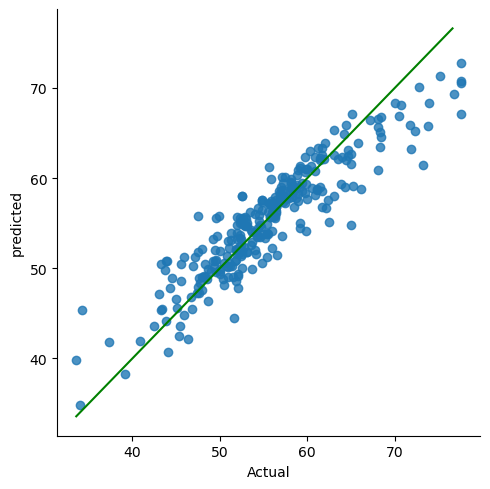

In [201]:
sns.lmplot(x="Actual",y="predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Ridge

In [202]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [203]:
rd.fit(x1_train,y1_train)

Ridge()

In [204]:
rd_pred=rd.predict(x1_test)
#rd_pred

In [205]:
rd_R2=rd.score(x1_train,y1_train)
rd_R2

0.8818545163495515

In [206]:
rd_a_R2=1-(((1-rd_R2)*(1168-1))/(1168-41-1))
rd_a_R2

0.8775525937654766

In [207]:
r_MSE=metrics.mean_squared_error(y1_test,rd_pred)
r_MSE

6.071434480501375

# RandomForestRegressor

In [208]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
rfr = RandomForestRegressor()

In [210]:
rfr.fit(x1_train, y1_train)

RandomForestRegressor()

In [211]:
rfr_pred=rfr.predict(x1_test)
#rfr_pred

In [212]:
rfr_R2=rfr.score(x1_train,y1_train)
rfr_R2

0.9817582553874855

In [213]:
rfr_a_R2=1-(((1-rfr_R2)*(1168-1))/(1168-41-1))
rfr_a_R2

0.981094035557012

In [214]:
rfr_MSE=metrics.mean_squared_error(y1_test,rfr_pred)
rfr_MSE

6.75067207982979

# XGB Regressor

In [215]:
import xgboost as xgb

In [216]:
xgb = xgb.XGBRegressor()

In [217]:
xgb.fit(x1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [218]:
xgb_pred=xgb.predict(x1_test)
#xgb_pred

In [219]:
xgb_R2=xgb.score(x1_train,y1_train)
xgb_R2

0.9995456665478288

In [220]:
xgb_a_R2=1-(((1-xgb_R2)*(1168-1))/(1168-41-1))
xgb_a_R2

0.999529123322661

In [221]:
xgb_MSE=metrics.mean_squared_error(y1_test,xgb_pred)
xgb_MSE

7.330915803284935

In [222]:
list1=["linear","Lasso","Ridge","RandomForestRegressor","XGB Regressor"]
list2=[R1,l_R2,rd_R2,rfr_R2,xgb_R2]
list3=[AdjR1,adjR2,rd_a_R2,rfr_a_R2,xgb_a_R2]
list4=[MSE,l_MSE,r_MSE,rfr_MSE,xgb_MSE]

In [223]:
final_result=pd.DataFrame({"Modelname":list1,"R-Square":list2,"AdjR2":list3,"MSE":list4})
final_result

,Modelname,R-Square,AdjR2,MSE
0,linear,0.881883,0.877582,6.088138
1,Lasso,0.814202,0.807437,9.773270
2,Ridge,0.881855,0.877553,6.071434
3,RandomForestRegressor,0.981758,0.981094,6.750672
4,XGB Regressor,0.999546,0.999529,7.330916


# Test file

In [224]:
#Reading the csv file with help of pandas library
test=pd.read_csv(r"C:\Users\HP\Desktop\House Prices\test (9).csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [225]:
test.shape

(1459, 80)

In [226]:
#we assign "id" feature to data21 variable
data2=test["Id"]
data2

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

# according to train file we droped unnecessary features.

In [227]:
test=test.drop(["Id","MSSubClass","MSZoning","LotFrontage","LotArea","Alley","LotShape","Utilities","Condition1","Condition2","BldgType","HouseStyle","Exterior1st","Exterior2nd","ExterQual","BsmtQual","BsmtExposure","BsmtFinType1","Heating","HeatingQC","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","FireplaceQu","GarageFinish","GarageCond","OpenPorchSF","EnclosedPorch","PoolArea","PoolQC","MiscFeature","MiscVal","MoSold","YrSold","SaleType"],axis=1)
test

,Street,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,3SsnPorch,ScreenPorch,Fence,SaleCondition
0,Pave,Lvl,Inside,Gtl,NAmes,5,6,1961,1961,Gable,...,1961.0,1.0,730.0,TA,Y,140,0,120,MnPrv,Normal
1,Pave,Lvl,Corner,Gtl,NAmes,6,6,1958,1958,Hip,...,1958.0,1.0,312.0,TA,Y,393,0,0,NaN,Normal
2,Pave,Lvl,Inside,Gtl,Gilbert,5,5,1997,1998,Gable,...,1997.0,2.0,482.0,TA,Y,212,0,0,MnPrv,Normal
3,Pave,Lvl,Inside,Gtl,Gilbert,6,6,1998,1998,Gable,...,1998.0,2.0,470.0,TA,Y,360,0,0,NaN,Normal
4,Pave,HLS,Inside,Gtl,StoneBr,8,5,1992,1992,Gable,...,1992.0,2.0,506.0,TA,Y,0,0,144,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Pave,Lvl,Inside,Gtl,MeadowV,4,7,1970,1970,Gable,...,NaN,0.0,0.0,NaN,Y,0,0,0,NaN,Normal
1455,Pave,Lvl,Inside,Gtl,MeadowV,4,5,1970,1970,Gable,...,1970.0,1.0,286.0,TA,Y,0,0,0,NaN,Abnorml
1456,Pave,Lvl,Inside,Gtl,Mitchel,5,7,1960,1996,Gable,...,1960.0,2.0,576.0,TA,Y,474,0,0,NaN,Abnorml
1457,Pave,Lvl,Inside,Gtl,Mitchel,5,5,1992,1992,Gable,...,NaN,0.0,0.0,NaN,Y,80,0,0,MnPrv,Normal


In [228]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Street         1459 non-null   object 
 1   LandContour    1459 non-null   object 
 2   LotConfig      1459 non-null   object 
 3   LandSlope      1459 non-null   object 
 4   Neighborhood   1459 non-null   object 
 5   OverallQual    1459 non-null   int64  
 6   OverallCond    1459 non-null   int64  
 7   YearBuilt      1459 non-null   int64  
 8   YearRemodAdd   1459 non-null   int64  
 9   RoofStyle      1459 non-null   object 
 10  RoofMatl       1459 non-null   object 
 11  MasVnrType     1443 non-null   object 
 12  MasVnrArea     1444 non-null   float64
 13  ExterCond      1459 non-null   object 
 14  Foundation     1459 non-null   object 
 15  BsmtCond       1414 non-null   object 
 16  BsmtFinSF1     1458 non-null   float64
 17  BsmtFinType2   1417 non-null   object 
 18  BsmtFinS

In [229]:
#checking null values from all columns
test.isnull().sum().sort_values(ascending=False)[:20]

Fence           1169
GarageQual        78
GarageYrBlt       78
GarageType        76
BsmtCond          45
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
Functional         2
BsmtFullBath       2
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
Fireplaces         0
PavedDrive         0
WoodDeckSF         0
3SsnPorch          0
dtype: int64

In [230]:
test.GarageArea.value_counts()

0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
          ..
453.0      1
1348.0     1
567.0      1
811.0      1
682.0      1
Name: GarageArea, Length: 459, dtype: int64

In [231]:
#missing value treatment for the categorical value
test.GarageType=test.GarageType.fillna('No Garage')
test.GarageQual=test.GarageQual.fillna('No Garage')
test.BsmtCond=test.BsmtCond.fillna('No Basement')

In [232]:
#Missing value treatment for the numeric value
test.GarageYrBlt=test.GarageYrBlt.fillna(test.GarageYrBlt.median())
test.MasVnrArea=test.MasVnrArea.fillna(test.MasVnrArea.median())
test.BsmtFullBath=test.BsmtFullBath.fillna(test.BsmtFullBath.median())
test.BsmtUnfSF=test.BsmtUnfSF.fillna(test.BsmtUnfSF.median())
test.BsmtFinSF1=test.BsmtFinSF1.fillna(test.BsmtFinSF1.median())
test.TotalBsmtSF=test.TotalBsmtSF.fillna(test.TotalBsmtSF.median())
test.GarageArea=test.GarageArea.fillna(test.GarageArea.median())

In [233]:
#Data Type Conversion
#Converting categorical column into numerical column(using LableEncoder)
for col in test.columns:
    le = LabelEncoder()
    le.fit(test[str(col)])
    test[str(col)] = le.transform(test[str(col)])

In [239]:
test=test.rename(columns={"1stFlrSF":"FlrSF_1","2ndFlrSF":"FlrSF_2"})

In [240]:
te_x=test.iloc[:,0:42] 

In [241]:
te_x.head()

,Street,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,3SsnPorch,ScreenPorch,Fence,SaleCondition
0,1,3,4,0,12,4,5,56,11,1,...,46,1,348,4,2,75,0,18,2,4
1,1,3,0,0,12,5,5,53,8,3,...,43,1,67,4,2,225,0,0,4,4
2,1,3,4,0,8,4,4,92,48,1,...,82,2,179,4,2,134,0,0,2,4
3,1,3,4,0,8,5,5,93,48,1,...,83,2,168,4,2,219,0,0,4,4
4,1,1,4,0,22,7,4,87,42,1,...,77,2,198,4,2,0,0,27,4,4


In [242]:
te_x.shape,x1_train.shape,y1_train.shape

((1459, 41), (1168, 41), (1168,))

# Prediction

In [243]:
xgb.fit(x1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [244]:
xgb_pred4=xgb.predict(te_x)
xgb_pred4

array([49.254444, 49.659897, 49.98719 , ..., 47.000893, 46.243126,
       52.422073], dtype=float32)

In [245]:
#Prediction of "SalesPrice"(target feature) 

In [246]:
df=pd.DataFrame(xgb_pred4,columns=["SalePrice"])
df

,SalePrice
0,49.254444
1,49.659897
2,49.987190
3,49.985134
4,57.181843
...,...
1454,48.841358
1455,46.522667
1456,47.000893
1457,46.243126


In [247]:
#creating a dataframe with id feature of test data.

In [248]:
d1=pd.DataFrame(data2)
d1

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [249]:
#concating d1 and df
result=pd.concat([d1,df],axis=1)
result

,Id,SalePrice
0,1461,49.254444
1,1462,49.659897
2,1463,49.987190
3,1464,49.985134
4,1465,57.181843
...,...,...
1454,2915,48.841358
1455,2916,46.522667
1456,2917,47.000893
1457,2918,46.243126


In [251]:
#converting dataframe into csv file.
result.to_csv(r"C:\Users\HP\Desktop\House Prices\Sample_Submission(House_Price_Prediction) .csv",index=False)